In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, math, time, platform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# import mrcnn.utils     as utils
# import mrcnn.visualize as visualize

pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import mrcnn.visualize_2 as vis2
import mrcnn.calculate_map as cmap

syst = platform.system()
eval_method = '2'


# epochs = ['0001', '0026', '0162', '0350', '0584', 
#           '0657', '0950', '1612', '1673', '2330', 
#           '3348', '3742', '3816', '4345']   #idx 13,14,15,16,17

#### BCE Training ---------------------------------------------------------------------------------
if syst == 'Windows':
    MAP_PATH    = "E:/git_projs/MRCNN3/train_coco/BCE_eval_method2_results"
    DIR_WEIGHTS = 'F:/models_coco/train_fcn8L2_BCE_subset/fcn20190112T0000' 
elif syst == 'Linux':
    MAP_PATH = "/home/kbardool/mrcnn3/train_coco/BCE_eval_method2_results"
    DIR_WEIGHTS = '/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190112T0000' 
else :
    raise Error('unrecognized system ')

print(' OS ' , syst, ' : ', MAP_PATH)

files = ['fcn_0001.h5', 'fcn_0026.h5', 'fcn_0162.h5', 'fcn_0350.h5', 'fcn_0584.h5', 
          'fcn_0657.h5', 'fcn_0950.h5', 'fcn_1612.h5', 'fcn_1673.h5', 'fcn_2330.h5', 
          'fcn_3348.h5', 'fcn_3742.h5', 'fcn_3816.h5', 'fcn_4345.h5']   #idx 13,14,15,16,17

#### MSE Training ---------------------------------------------------------------------------------

# if syst == 'Windows':
#     MAP_PATH = "E:/git_projs/MRCNN3/train_coco/MSE_eval_method"+eval_method+"_results"
#     DIR_WEIGHTS =  'F:/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 
# elif syst == 'Linux':
#     MAP_PATH   = "/home/kbardool/mrcnn3/train_coco/MSE_eval_method"+eval_method+"_results"
#     DIR_WEIGHTS =  '/home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 

# print(' OS ' , syst, ' SAVE_PATH   : ', save_path)
# print(' OS ' , syst, ' DIR_WEIGHTS : ', DIR_WEIGHTS)
    
# files       = ['fcn_0001.h5', 'fcn_0100.h5', 'fcn_0220.h5', 'fcn_0464.h5',
#                'fcn_0690.h5', 'fcn_1015.h5', 'fcn_1228.h5', 'fcn_1568.h5', 
#                'fcn_1603.h5', 'fcn_1806.h5']

COLORS = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']    


# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 

CLASS_IDS     = [10, 11, 12, 13, 14, 
                 30, 31, 32, 33, 34, 
                 35, 36, 37, 38, 39, 
                 40, 41, 42, 43, 44, 
                 45, 46, 69, 70, 71, 
                 72, 73]

CLASS_IDS_SG1 = [10, 11, 12, 13, 14, 
                 30, 31, 32, 33, 34, 
                 35, 36]
CLASS_IDS_SG2 = [37, 38, 39, 
                 40, 41, 42, 43, 44, 
                 45, 46, 69, 70, 71, 
                 72, 73]

## COCO EXTERNAL CLASS IDS : [10, 11, 13, 14, 15, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 78, 79, 80, 81, 82]
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
 OS  Linux  :  /home/kbardool/mrcnn3/train_coco/BCE_eval_method2_results


## Load and display AP_results_2019_mm_dd (calculated over individual images)

In [8]:
new_AP_results_file = 'eval'+eval_method+'_AP_results_2019_05_16'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
vis2.display_AP_file( os.path.join(MAP_PATH, new_AP_results_file+'.pkl')) 

Path: /home/kbardool/mrcnn3/train_coco/BCE_eval_method2_results     Filename:  eval2_AP_results_2019_05_16

/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5 1612
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1673.h5 1673
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_2330.h5 2330
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3348.h5 3348
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3742.h5 3742
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3816.h5 3816
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 4345


After 1612 training epochs.
Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
---------------------------------------------------------

#### Display AP_Results

In [7]:
new_AP_results_file = 'eval1_AP_results_2019_05_15'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)

with open(os.path.join(MAP_PATH, new_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

for key in sorted(APRes) :
    print('\n\nAfter {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print("\n{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))

Path: /home/kbardool/mrcnn3/train_coco/BCE_eval_method1_results     Filename:  eval1_AP_results_2019_05_15
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5 1612
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1673.h5 1673
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_2330.h5 2330
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3348.h5 3348
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3742.h5 3742
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3816.h5 3816
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 4345


After 1612 training epochs.
Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
----------------------------------------------------------

## Build Mean Average Precision Data Structure 
Using loaded gt_boxes and pr_boxes.
    ALL_DATA is a dictionary keyed by class_id to dictionaries, one for each possible score. Each SCORE dictionary is itrself a dictionary with keys for iOUs 
    between 0.5 and 0.95. Each dictionary entry has the following keys:
    {'iou', 'model_thrs', 'recalls', 'precisions', 'avg_prec'}
    iou :         indicates the iOU threshold of the dictionary entry
    model_thrs:   score thresholds
    recalls   :   recall at threshold
    precision :   precision at threshold


- Create `gt_boxes_class`, `pr_boxes_class` (separated by class)  - 

### Build and Save `map_info_epochxxxx` file from  `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [12]:
for FILE_IDX in [9]:
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

    cls_info_file = 'eval'+eval_method+'_cls_info_epoch' +epochs+'_500.pkl'
    pr_boxes_file = 'eval'+eval_method+'_pr_bboxes_epoch'+epochs+'_500.pkl'
    gt_boxes_file = 'eval'+eval_method+'_gt_bboxes_epoch'+epochs+'_500.pkl'
 
    with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
        cls_info = pickle.load(infile)            
    with open(os.path.join(MAP_PATH, pr_boxes_file), 'rb') as infile:
        pr_boxes = pickle.load(infile)
    with open(os.path.join(MAP_PATH, gt_boxes_file), 'rb') as infile:
        gt_boxes = pickle.load(infile)
    print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    

     ## build gt_boxes_class, pr_boxes_class which only containing info for each class
        
    scores    = [ 'mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
    iou_thresholds = np.arange(0.20, 0.95, 0.05)
    
    all_data = gt_boxes_class = pr_boxes_class = {}
    gt_boxes_class, pr_boxes_class  = cmap.filter_by_class(gt_boxes, pr_boxes, class_ids= CLASS_IDS )

    all_data = cmap.build_mAP_data_structure_by_class(gt_boxes_class, pr_boxes_class,  CLASS_IDS, scores, iou_thresholds)
    all_data[0] = cmap.build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores, iou_thresholds)

    print(all_data.keys())

    ### Save mAP data to file `map_info_epochxxxx.pkl` for future reuse

    map_info_file = 'eval'+eval_method+'_map_info_epoch'+epochs+'.pkl'
    with open(os.path.join(MAP_PATH, map_info_file), 'wb') as outfile:
        pickle.dump(all_data, outfile)            
    print(' Datafile :', map_info_file , ' saved')

loaded : eval1_cls_info_epoch1806_500.pkl     eval1_pr_bboxes_epoch1806_500.pkl      eval1_gt_bboxes_epoch1806_500.pkl
 # pr keys : 500 # gt_keys:  500
 Processing class :  10
 Processing class :  11
 Processing class :  12
 Processing class :  13
 Processing class :  14
 Processing class :  30
 Processing class :  31
 Processing class :  32
 Processing class :  33
 Processing class :  34
 Processing class :  35
 Processing class :  36
 Processing class :  37
 Processing class :  38
 Processing class :  39
 Processing class :  40
 Processing class :  41
 Processing class :  42
 Processing class :  43
 Processing class :  44
 Processing class :  45
 Processing class :  46
 Processing class :  69
 Processing class :  70
 Processing class :  71
 Processing class :  72
 Processing class :  73
Build mAP information for classes:  [10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 70, 71, 72, 73]  and scores  ['mrcnn_score_orig', 'mrcnn_score_norm', '

 score_key: fcn_score_2             iou_thr: 0.20  (idx  0)  
 score_key: fcn_score_2             iou_thr: 0.25  (idx  1)  
 score_key: fcn_score_2             iou_thr: 0.30  (idx  2)  
 score_key: fcn_score_2             iou_thr: 0.35  (idx  3)  
 score_key: fcn_score_2             iou_thr: 0.40  (idx  4)  
 score_key: fcn_score_2             iou_thr: 0.45  (idx  5)  
 score_key: fcn_score_2             iou_thr: 0.50  (idx  6)  
 score_key: fcn_score_2             iou_thr: 0.55  (idx  7)  
 score_key: fcn_score_2             iou_thr: 0.60  (idx  8)  
 score_key: fcn_score_2             iou_thr: 0.65  (idx  9)  
 score_key: fcn_score_2             iou_thr: 0.70  (idx 10)  
 score_key: fcn_score_2             iou_thr: 0.75  (idx 11)  
 score_key: fcn_score_2             iou_thr: 0.80  (idx 12)  
 score_key: fcn_score_2             iou_thr: 0.85  (idx 13)  
 score_key: fcn_score_2             iou_thr: 0.90  (idx 14)  
dict_keys([0, 69, 70, 71, 72, 73, 10, 11, 12, 13, 14, 30, 31, 32, 33, 

### Load previously build `map_info_epochxxxx`  file

In [1]:
idx = 9
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

map_info_file = 'eval'+eval_method+'_map_info_epoch' +epochs+'.pkl'
cls_info_file = 'eval'+eval_method+'_cls_info_epoch' +epochs+'_500.pkl'
pr_boxes_file = 'eval'+eval_method+'_pr_bboxes_epoch'+epochs+'_500.pkl'
gt_boxes_file = 'eval'+eval_method+'_gt_bboxes_epoch'+epochs+'_500.pkl'

with open(os.path.join(MAP_PATH, map_info_file), 'rb') as infile:
    all_data = pickle.load(infile)             
print('loaded :', map_info_file)    

with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
    cls_info_load = pickle.load(infile)            
cls_info =  [] 
cls_info.extend([cls_info_load[i] for i in CLASS_IDS])
    
# with open(os.path.join(MAP_PATH, pr_boxes_file), 'rb') as infile:
#     pr_boxes = pickle.load(infile)
# with open(os.path.join(MAP_PATH, gt_boxes_file), 'rb') as infile:
#     gt_boxes = pickle.load(infile)
print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    
    


NameError: name 'files' is not defined

## Data Structure displays

In [ ]:
# class_ids = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# class_ids = [1,2,3,4,5,6]
# ## build gt_boxes_class, pr_boxes_class which only containing info for each class 

# key = 'newshapes_00321' 
# cls = 3
# print(gt_boxes_class[cls][key]['class_ids'])
# print(gt_boxes_class[cls][key]['boxes'])
# print(' ==== P')
# print(pr_boxes_class[cls][key]['class_ids'])
# print(pr_boxes_class[cls][key]['boxes'])

### display `gt_boxes` and `pr_boxes`

In [11]:
pr_keys = list(pr_boxes.keys())
gt_keys = list(gt_boxes.keys())
# cls_keys= cls_info
# print(gt_boxes.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()), len(cls_info))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
print('keys for GT')
print(gt_boxes[gt_keys[0]].keys())
print('keys for PR')
print(pr_boxes[pr_keys[0]].keys())
print('keys for CLS_INFO')
# print(cls_info.keys())
# pp.pprint(cls_info)
print()
print(' pr key: ',pr_keys[0])
print(pr_boxes[pr_keys[0]]['boxes'])
print(pr_boxes[pr_keys[0]]['scores'])
print(pr_boxes[pr_keys[0]]['class_ids'])
print(pr_boxes[pr_keys[0]]['det_ind'])
print()
print(' gt key: ',gt_keys[0])
print(gt_boxes[gt_keys[0]]['boxes'])
print(gt_boxes[gt_keys[0]]['class_ids'])


500 500 7
500 ['newshapes_00204', 'newshapes_00328', 'newshapes_00364', 'newshapes_00291', 'newshapes_00238', 'newshapes_00293', 'newshapes_00445', 'newshapes_00010', 'newshapes_00151', 'newshapes_00046']
500 ['newshapes_00204', 'newshapes_00328', 'newshapes_00364', 'newshapes_00291', 'newshapes_00238', 'newshapes_00293', 'newshapes_00445', 'newshapes_00010', 'newshapes_00151', 'newshapes_00046']
keys for GT
dict_keys(['boxes', 'class_ids'])
keys for PR
dict_keys(['mrcnn_score_2', 'boxes', 'mrcnn_score_norm', 'det_ind', 'mrcnn_score_0', 'mrcnn_score_orig', 'fcn_score_1', 'class_ids', 'fcn_score_2', 'scores', 'fcn_score_0', 'mrcnn_score_1'])
keys for CLS_INFO

 pr key:  newshapes_00204
[[86.0, 17.0, 109.0, 88.0], [19.0, 40.0, 42.0, 111.0], [99.0, 69.0, 110.0, 99.0], [18.0, 29.0, 29.0, 59.0], [94.0, 92.0, 111.0, 128.0], [17.0, 0.0, 34.0, 36.0], [40.0, 88.0, 83.0, 119.0], [45.0, 9.0, 88.0, 40.0], [18.0, 73.0, 41.0, 128.0], [87.0, 0.0, 110.0, 55.0], [48.0, 28.0, 71.0, 33.0], [57.0, 95.0, 8

In [169]:
# for key in sorted(pr_keys[:1000]):  ##  'newshapes_00115'
#     print(key, '  ' ,  pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] , ' - ',pr_boxes[key]['mrcnn_score_1'],pr_boxes[key]['mrcnn_score_2'])
#     print(key, '  ' , pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] )

In [33]:
# # class_data = all_data[1]
# # score_key = 'scores'
# # for idx, iou_key in enumerate(sorted(class_data[score_key])):
# #     print(idx, iou_key)
# bb = [0.7777, 0.7569, 0.6442, 0.4946, 0.3545, 0.1565, 0.0654, 0.0264, 0.005]
# avg_precs = [" {:10.4f}".format(ap) for ap in bb]
# # avg_precs = [str(ap) for ap in bb]
# b1 = ""
# print(b1.join(avg_precs))

In [81]:
# print(gt_boxes['newshapes_00469'])
# print(gt_boxes_class[1]['newshapes_00469'])
# print()
# pp.pprint(pr_boxes['newshapes_00469'])
# pp.pprint(pr_boxes_class[1]['newshapes_00469'])

#### display `cls_info` 

In [4]:
print(cls_info[1]['scores'][:20])
print(cls_info[1]['mrcnn_score_orig'][:20])
print(cls_info[1]['mrcnn_score_norm'][:20])
print()
print(cls_info[1]['mrcnn_score_0'][:20])
print(cls_info[1]['mrcnn_score_1'][:20])
print(cls_info[1]['mrcnn_score_2'][:20])
 

[0.9361, 0.9361, 0.9359, 0.9359, 0.9362, 0.9362, 0.936, 0.936, 0.9358, 0.9358, 0.9362, 0.9362, 0.9362, 0.9362, 0.9361, 0.9361, 0.936, 0.936, 0.9362, 0.9362]
[0.9361, 0.9361, 0.9359, 0.9359, 0.9362, 0.9362, 0.936, 0.936, 0.9358, 0.9358, 0.9362, 0.9362, 0.9362, 0.9362, 0.9361, 0.9361, 0.936, 0.936, 0.9362, 0.9362]
[1.0, 1.0, 0.9998, 0.9998, 1.0, 1.0, 0.9998, 0.9998, 0.9996, 0.9996, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9999, 0.9998, 0.9998, 1.0, 1.0]

[0.9297, 0.9297, 0.9323, 0.9323, 0.8707, 0.8707, 0.8737, 0.8737, 0.932, 0.932, 0.9324, 0.9324, 0.8729, 0.8729, 0.8714, 0.8714, 0.9323, 0.9323, 0.9325, 0.9325]
[0.6749, 0.6749, 0.6616, 0.6616, 0.6159, 0.6159, 0.62, 0.62, 0.6765, 0.6765, 0.6768, 0.6768, 0.6247, 0.6247, 0.6314, 0.6314, 0.6616, 0.6616, 0.6617, 0.6617]
[0.6749, 0.6749, 0.6616, 0.6616, 0.6159, 0.6159, 0.62, 0.62, 0.6765, 0.6765, 0.6768, 0.6768, 0.6247, 0.6247, 0.6314, 0.6314, 0.6616, 0.6616, 0.6617, 0.6617]


In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 2)
# print(len(pr_boxes_class.keys()), len(gt_boxes_class.keys()))

In [ ]:
# for img_id in pred_boxes.keys():
#     arg_sort = np.argsort(pred_boxes[img_id]['scores'])
#     pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id]['scores'])[arg_sort].tolist()
#     pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()

# print(type(class_pr_info), type(pr_boxes))    
# pr_keys = list(gt_boxes.keys())
# print(len(pr_keys))
# pp.pprint(class_pr_info[6].keys())

# class_stats  = {}
# class_stats.setdefault('avg', [cls['avg'] for cls in class_pr_info])
# class_stats.setdefault('pct', [cls['percentiles'] for cls in class_pr_info])   
# pp.pprint(class_stats)

# print(len(pr_keys), pr_keys[0])
# print(pr_boxes[pr_keys[0]])

# print(pred_boxes[pr_keys[0]])
# print(len(gt_boxes.keys()))

#### display of gt_boxes_class, pr_boxes_class

In [79]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 5)
# gt_boxes_class, pr_boxes_class = filter_by_class_2(gt_boxes, pr_boxes, class_id= 2)

# print(type(gt_boxes_class), type(pr_boxes_class))
# pr_keys = list(pr_boxes_class.keys())
# gt_keys = list(gt_boxes_class.keys())

# print(len(gt_boxes.keys()), len(pr_boxes.keys()))

# print(len(gt_keys), gt_keys[:10])
# print(len(pr_keys), pr_keys[:10])

# # pp.pprint(pr_boxes['newshapes_00002'])
# for key in gt_keys[:10]:
#     print('-----------------------')
#     print('Key: ', key)
#     print('-----------------------')
#     pp.pprint(pr_boxes_class[key])
#     print()
#     pp.pprint(gt_boxes_class[key])

In [ ]:

# class_ids     = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# Runs it for one IoU threshold


In [80]:
# for cls in [1,2,3,4,5,6]:
#     print('========================================')
#     for i in pr_boxes_class[cls]:
#         print(cls, '  ', i, len(pr_boxes_class[cls][i]['class_ids']) == len(pr_boxes_class[cls][i]['boxes']), len(pr_boxes_class[cls][i]['class_ids']), len(pr_boxes_class[cls][i]['boxes']))
#         print(cls, '  ', i, len(gt_boxes_class[cls][i]['class_ids']) == len(gt_boxes_class[cls][i]['boxes']), len(gt_boxes_class[cls][i]['class_ids']), len(gt_boxes_class[cls][i]['boxes']))

#### display `all_data`

In [18]:
print(all_data.keys())
print(all_data[1].keys())
print(all_data[1]['mrcnn_score_2'].keys())
print(all_data[1]['mrcnn_score_2'][0.5].keys())

dict_keys([0, 1, 2, 3, 4, 5, 6])
dict_keys(['mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_orig', 'mrcnn_score_2', 'fcn_score_1', 'mrcnn_score_norm', 'fcn_score_0', 'fcn_score_2'])
dict_keys([0.5, 0.55, 0.85, 0.6, 0.8, 0.7, 0.9, 0.65, 0.75])
dict_keys(['model_thrs', 'iou', 'avg_prec', 'precisions', 'recalls', 'prec_at_rec'])


In [ ]:
score_key = 'mrcnn_score_0'
print(all_data.keys())
print(all_data[0].keys())
print(all_data[0][score_key].keys())
print(all_data[0][score_key][0.5].keys())
print(' iou             : ', all_data[0][score_key][0.5]['iou'])
print(' score_thresholds: ', len(all_data[0][score_key][0.5]['model_thrs']))
print(' precisions      : ', len(all_data[0][score_key][0.5]['precisions']))
print(' recalls         : ', len(all_data[0][score_key][0.5]['recalls']))
print(' prec_at_rec     : ', len(all_data[0][score_key][0.5]['prec_at_rec']))
print(' prec_at_rec     : ', all_data[0][score_key][0.5]['prec_at_rec'])

In [ ]:
# for lst in all_data[1]:
#     print(lst)
#     print(all_data[1][lst])
# #     ['iou'], lst['avg_prec'])
#     print(len(all_data[1][lst]['model_thrs']), len(all_data[1][lst]['precisions']), len(all_data[1][lst]['recalls']))

### display `cls_info`

In [100]:
print(type(cls_info))
print(len(cls_info[1]))
# pp.pprint(cls_info[2])
cls_stats_info =  [] 
cls_stats_info.extend([cls_info[i] for i in CLASS_IDS])
# pp.pprint(cls_stats_info[0])
print(len(cls_stats_info[1]['mrcnn_score_1']), len(cls_stats_info[1]['bboxes']))

<class 'list'>
12
28 28


In [ ]:
score_key = 'mrcnn_score_0'
print(all_data.keys())
print(all_data[0].keys())
print(all_data[0][score_key].keys())
print(all_data[0][score_key][0.5].keys())
print(' iou             : ', all_data[0][score_key][0.5]['iou'])
print(' score_thresholds: ', len(all_data[0][score_key][0.5]['model_thrs']))
print(' precisions      : ', len(all_data[0][score_key][0.5]['precisions']))
print(' recalls         : ', len(all_data[0][score_key][0.5]['recalls']))
print(' prec_at_rec     : ', len(all_data[0][score_key][0.5]['prec_at_rec']))
print(' prec_at_rec     : ', all_data[0][score_key][0.5]['prec_at_rec'])

In [ ]:
# for lst in all_data[1]:
#     print(lst)
#     print(all_data[1][lst])
# #     ['iou'], lst['avg_prec'])
#     print(len(all_data[1][lst]['model_thrs']), len(all_data[1][lst]['precisions']), len(all_data[1][lst]['recalls']))

### plot mAP for one class and one threshold

Single IoU calculation took 0.5814 secs
avg precision: 0.8084
[0.5]
[0.8083785616727233]
 precisions:  (273,)
 recalls   :  (273,)
map: 80.84
avg precs:  [0.8084]
iou_thrs:   [0.5]

Plotting and calculating mAP takes 0.6595 secs


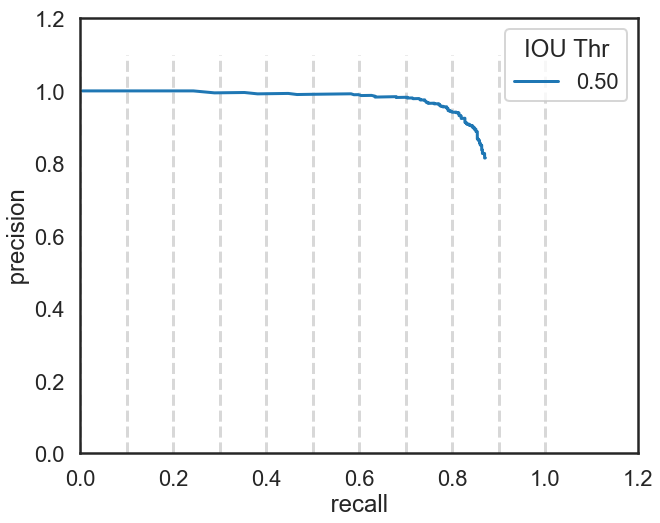

In [8]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes_class[cls], pr_boxes_class[cls], iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

### Display mAP one threshold (across all classes)

Single IoU calculation took 4.3709 secs
avg precision: 0.4631
[0.5]
[0.4631445460351786]
 precisions:  (36,)
 recalls   :  (36,)
map: 46.31
avg precs:  [0.4631]
iou_thrs:   [0.5]

Plotting and calculating mAP takes 4.3865 secs


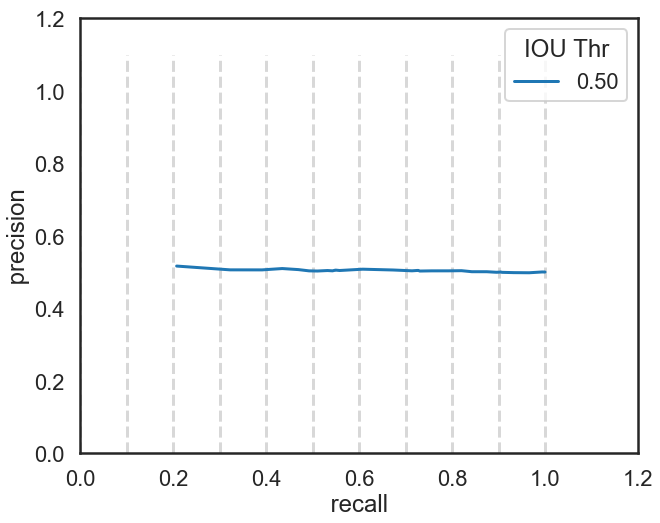

In [36]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes, pr_boxes, iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

## Display distribution of various scores 

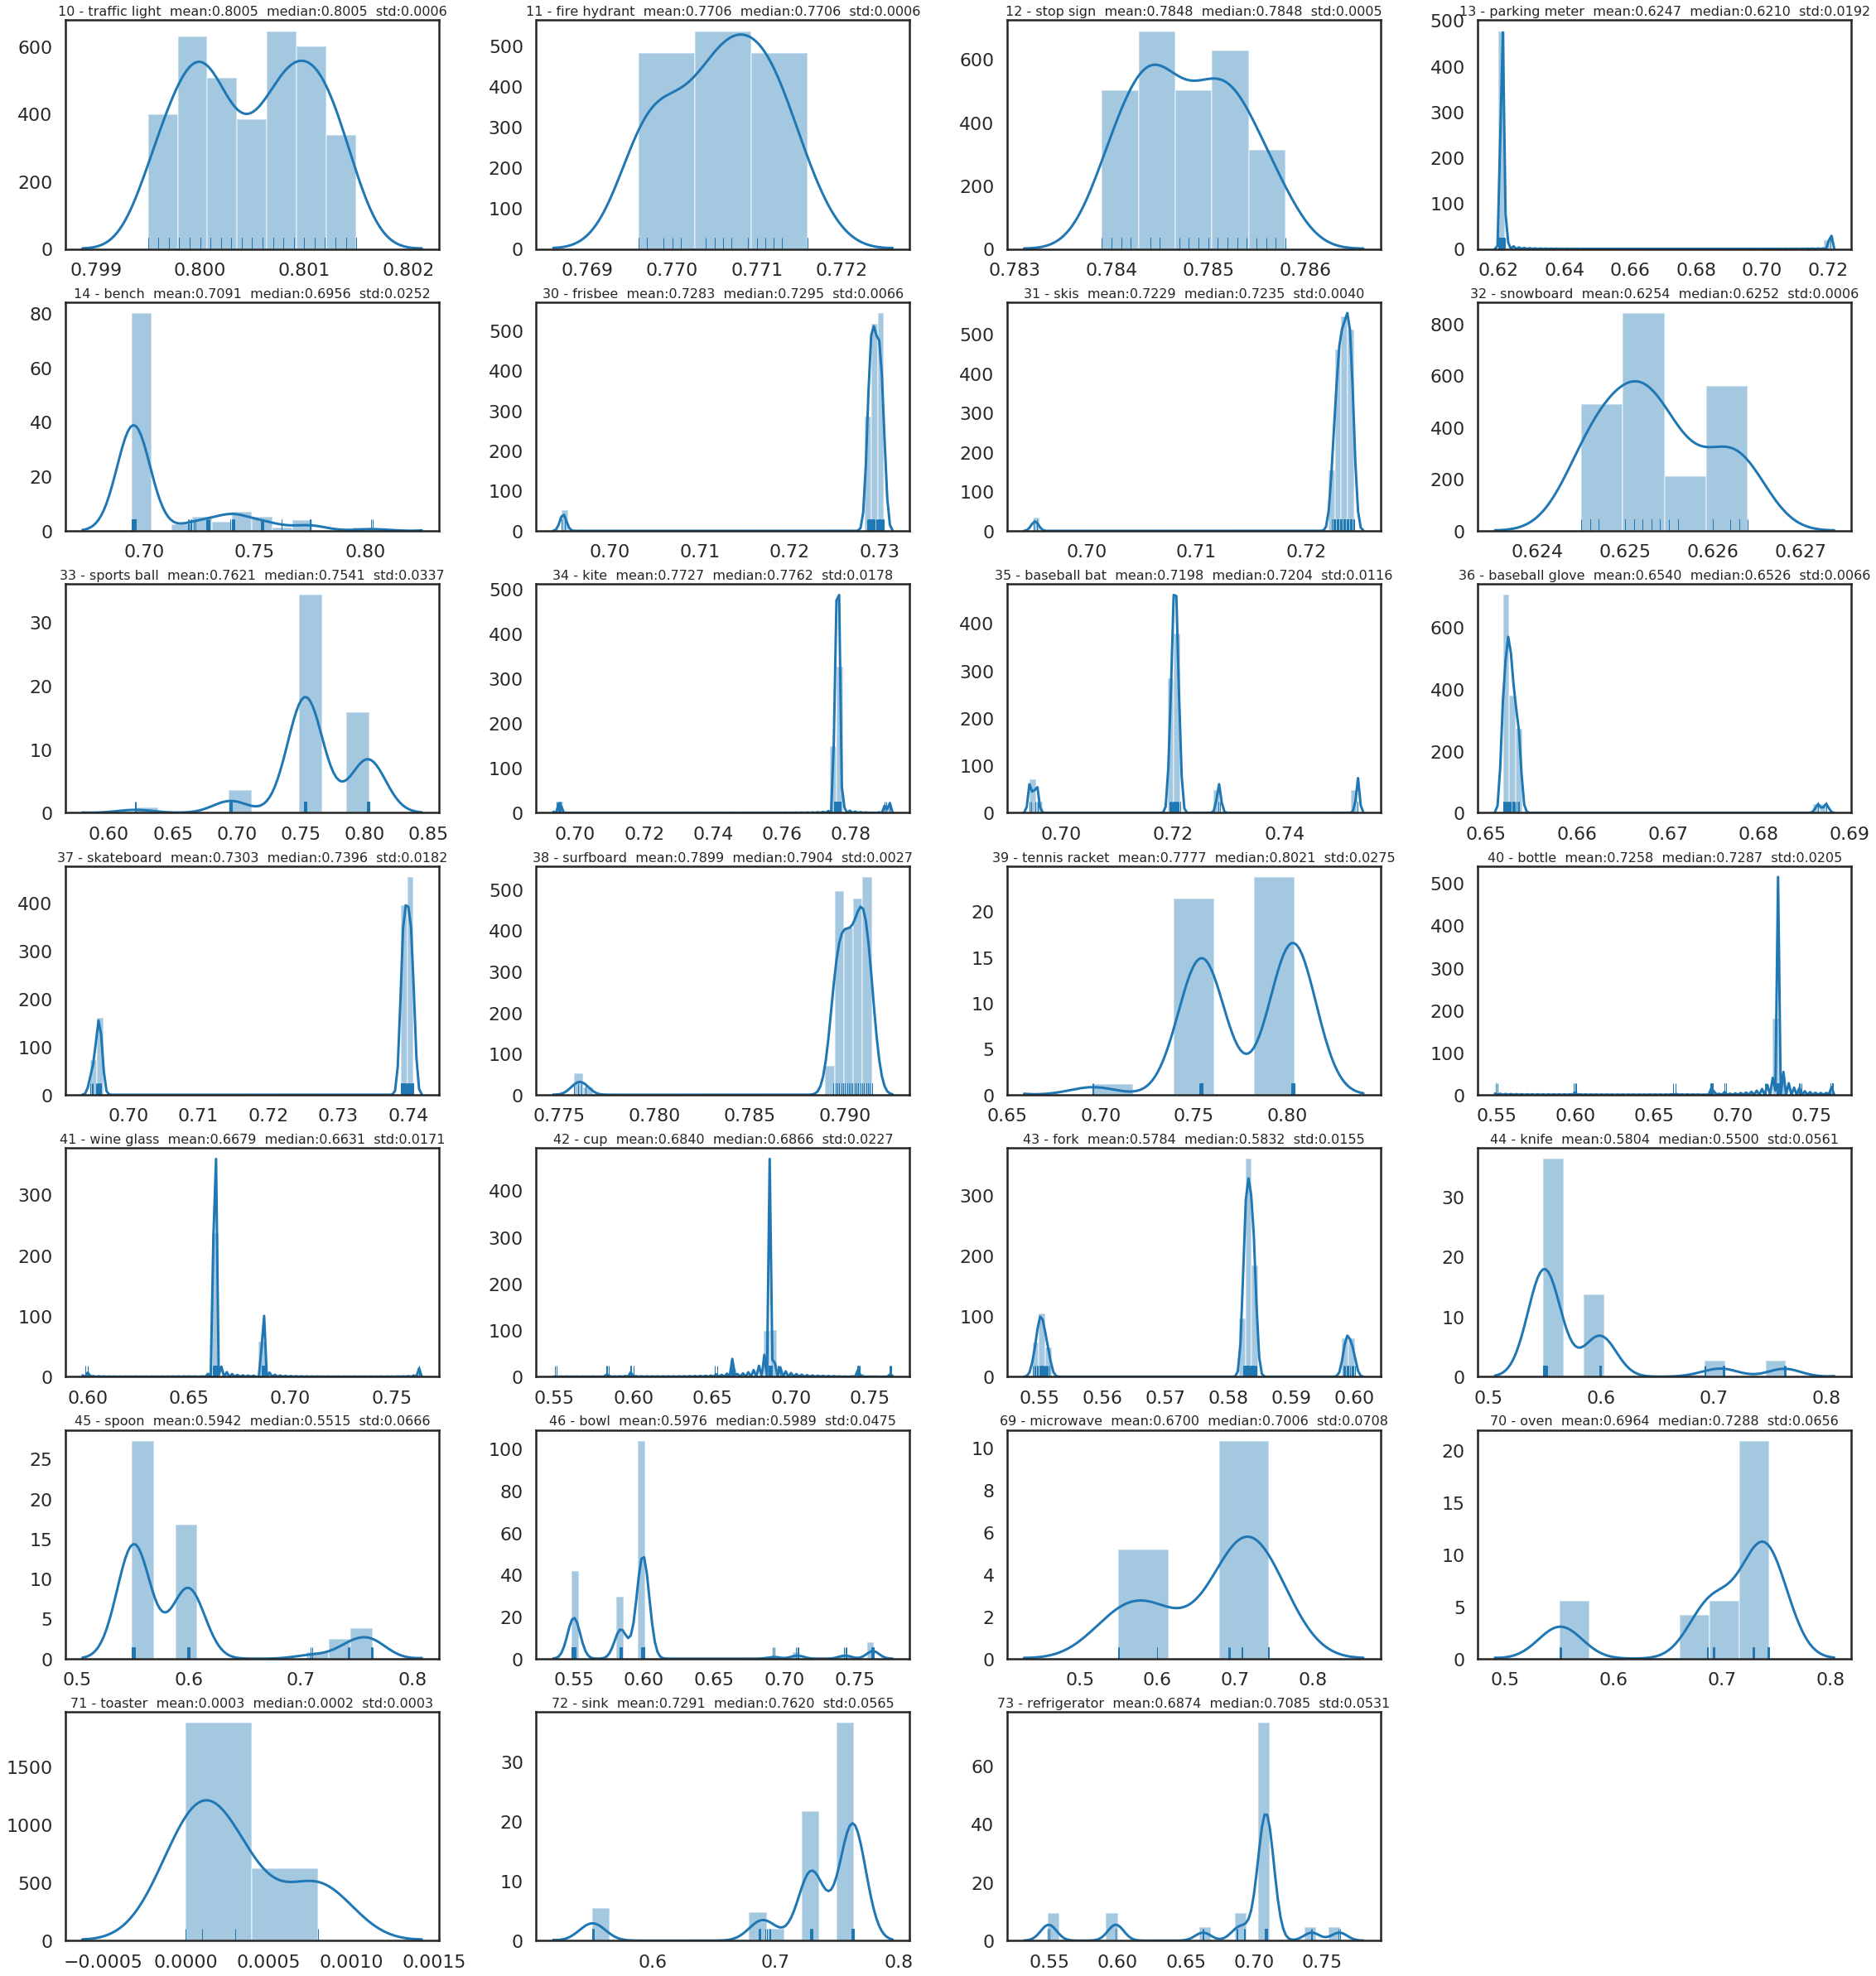

In [14]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_orig')

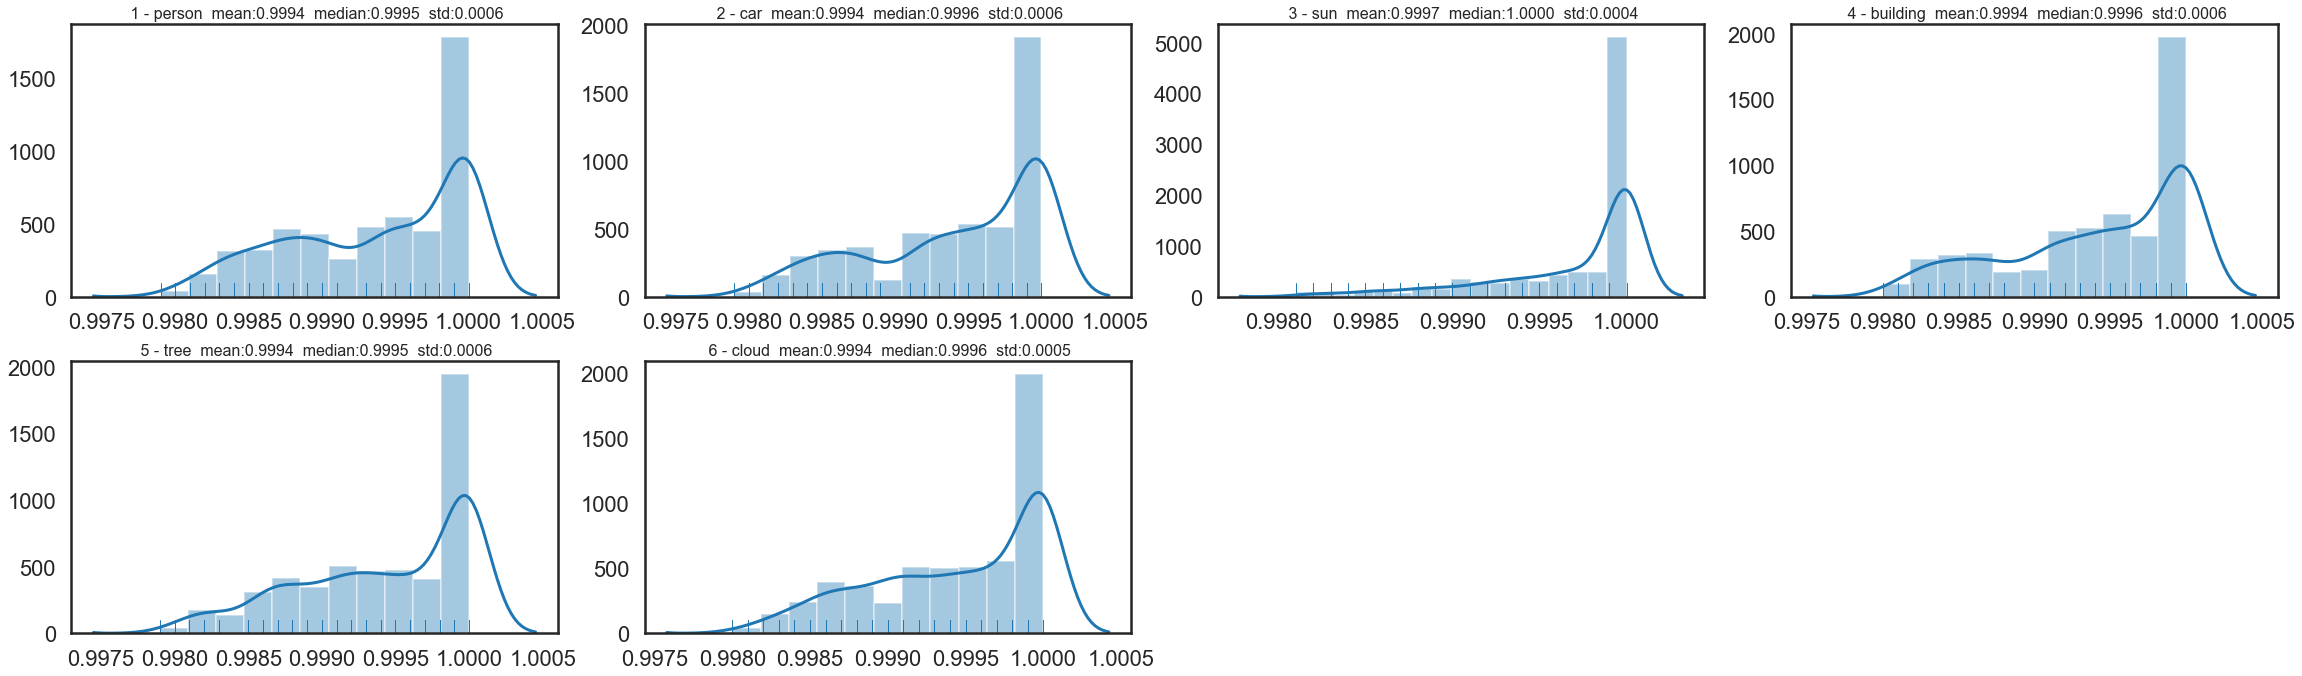

In [10]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_norm')

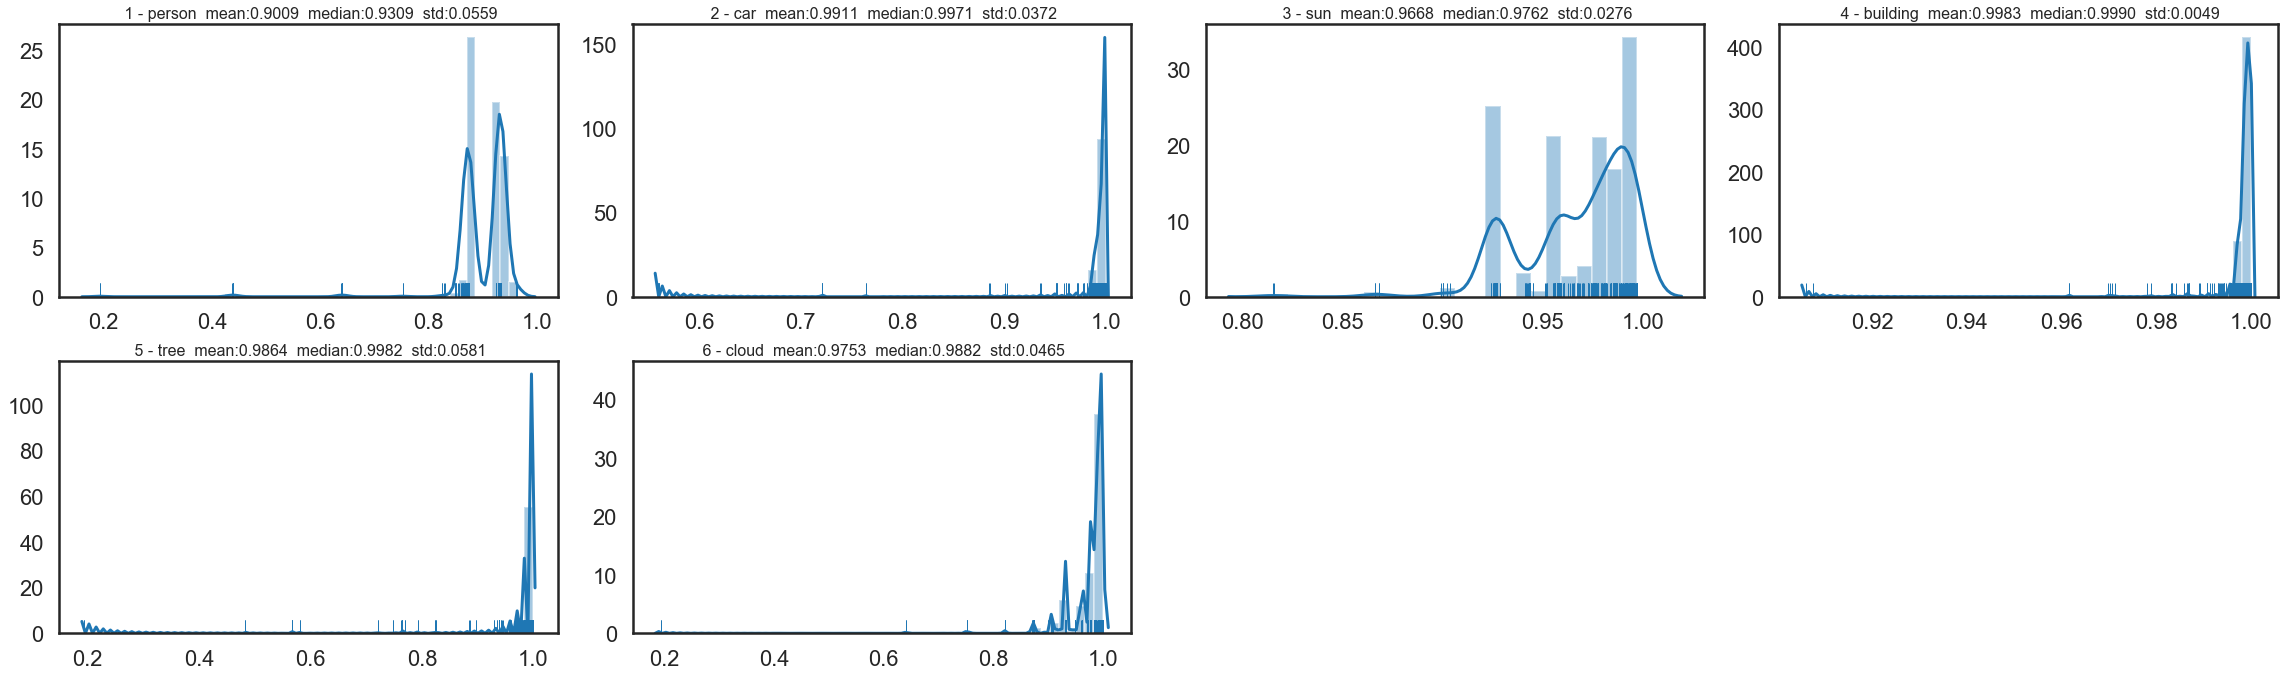

In [11]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_0')

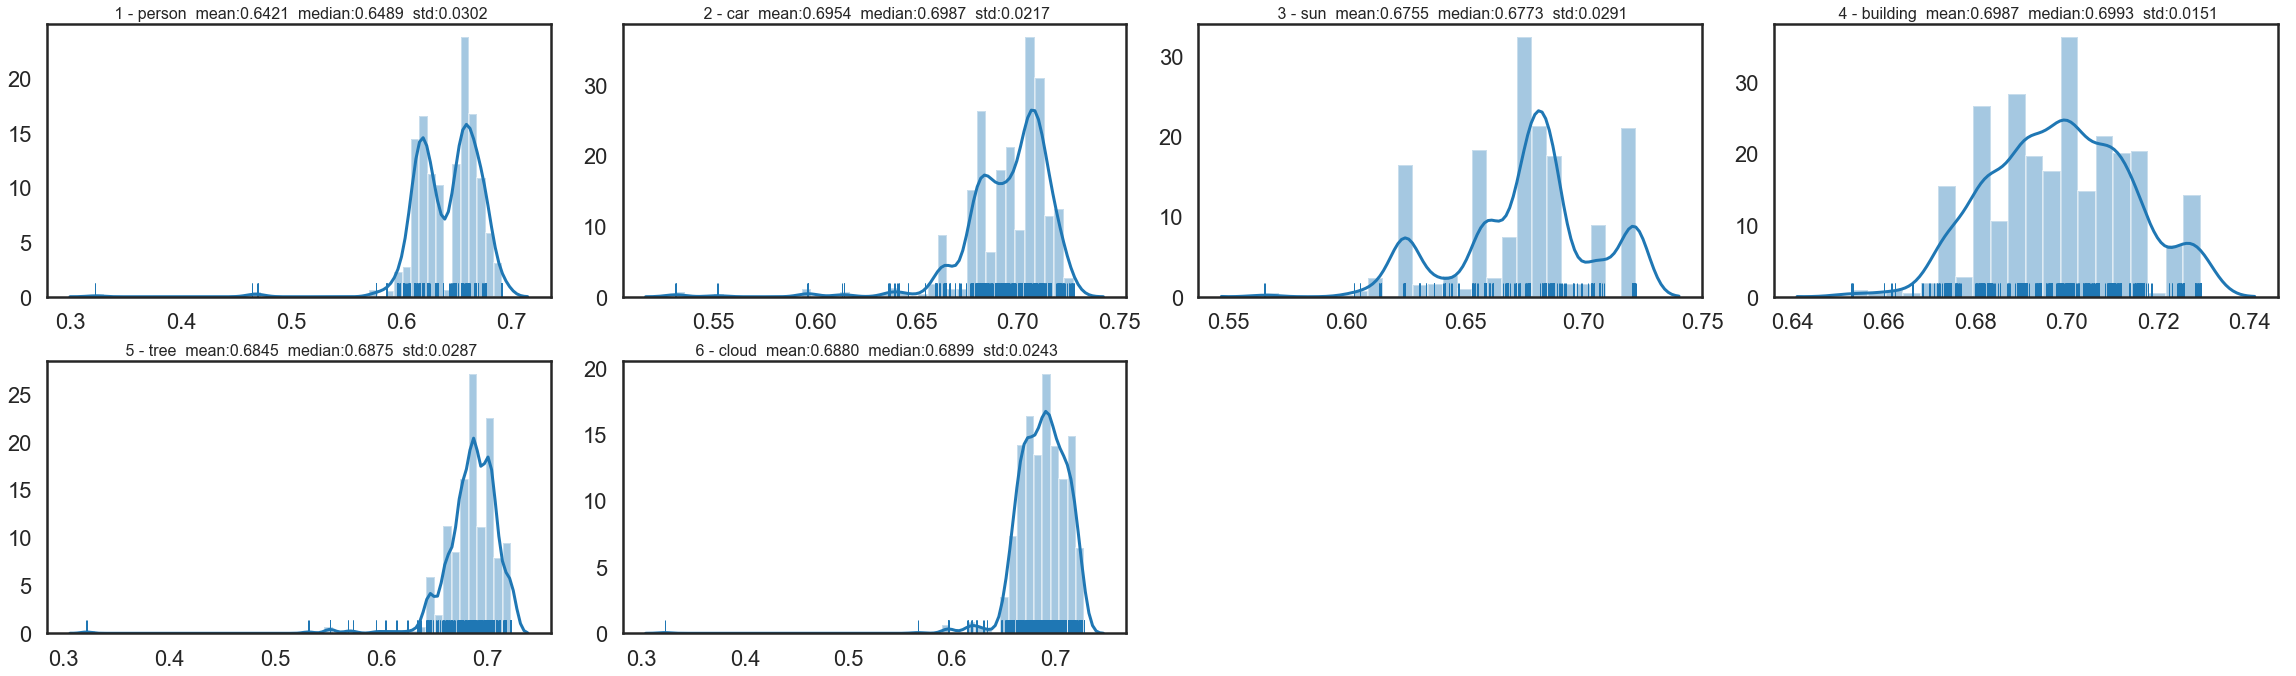

In [13]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_1')

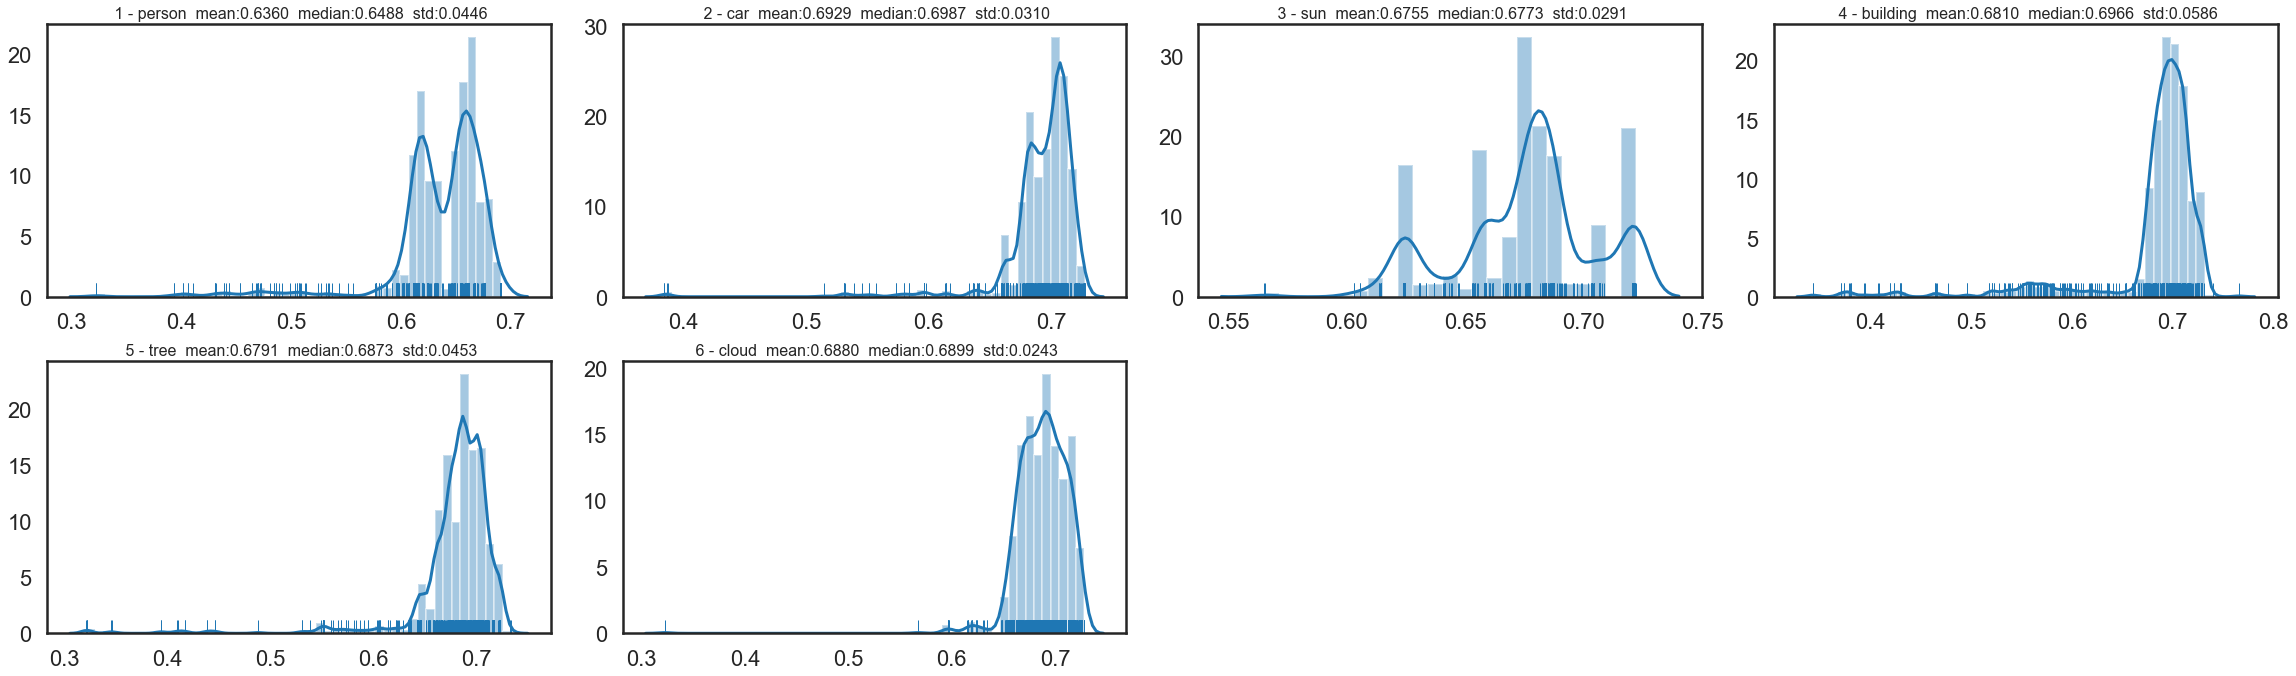

In [12]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_2')

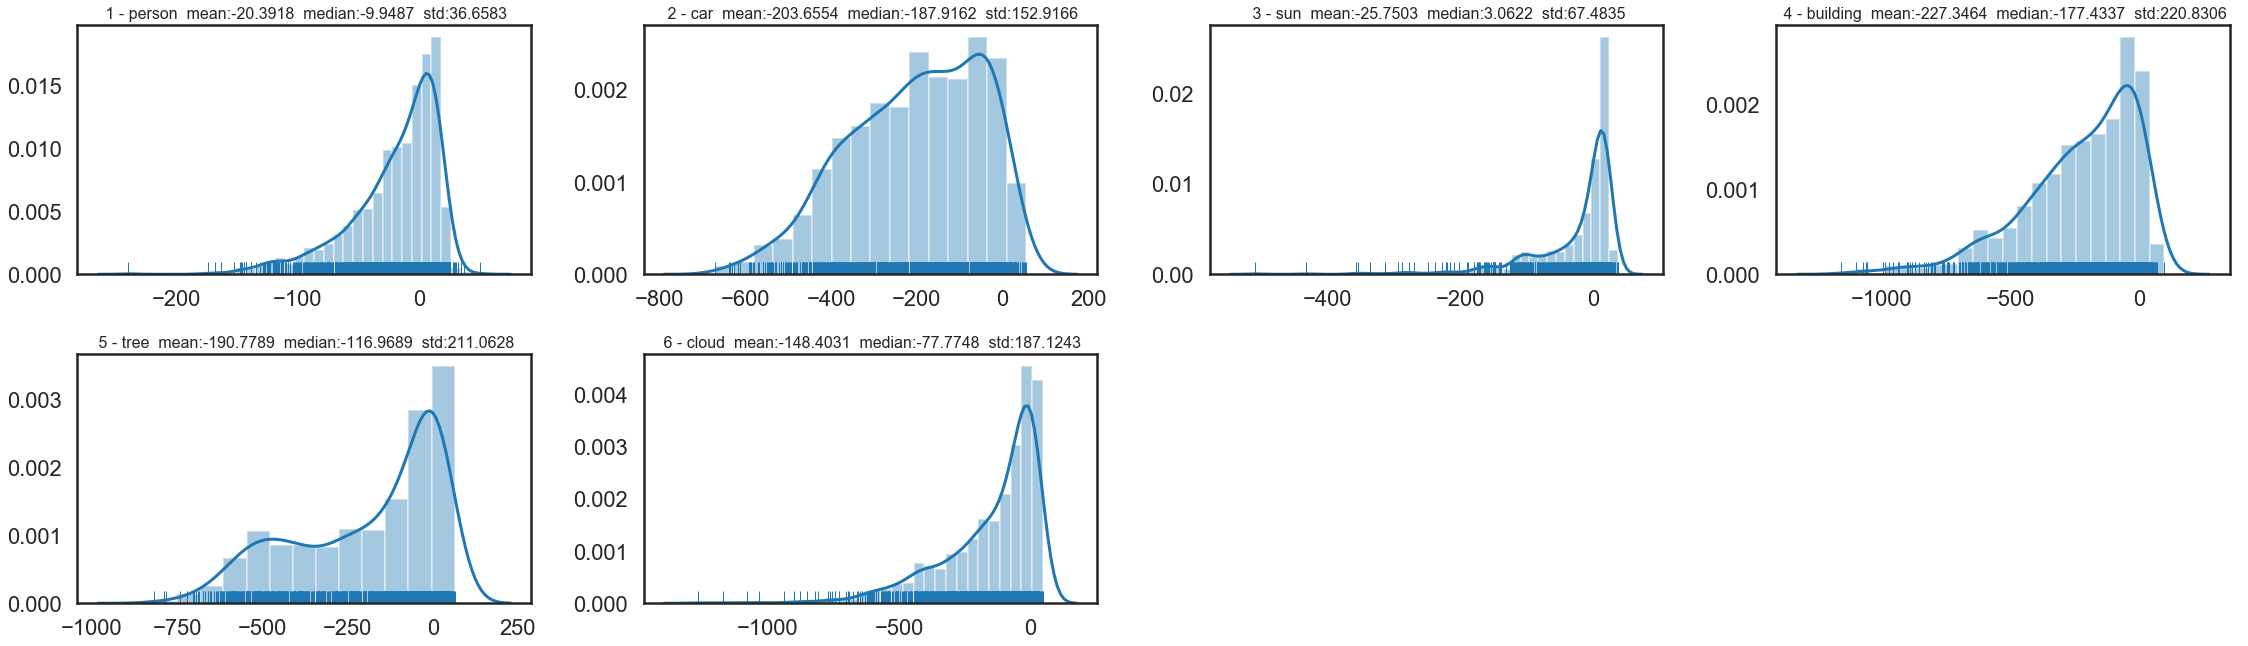

In [44]:
cmap.plot_score_distribution(cls_info, 'fcn_score_0')

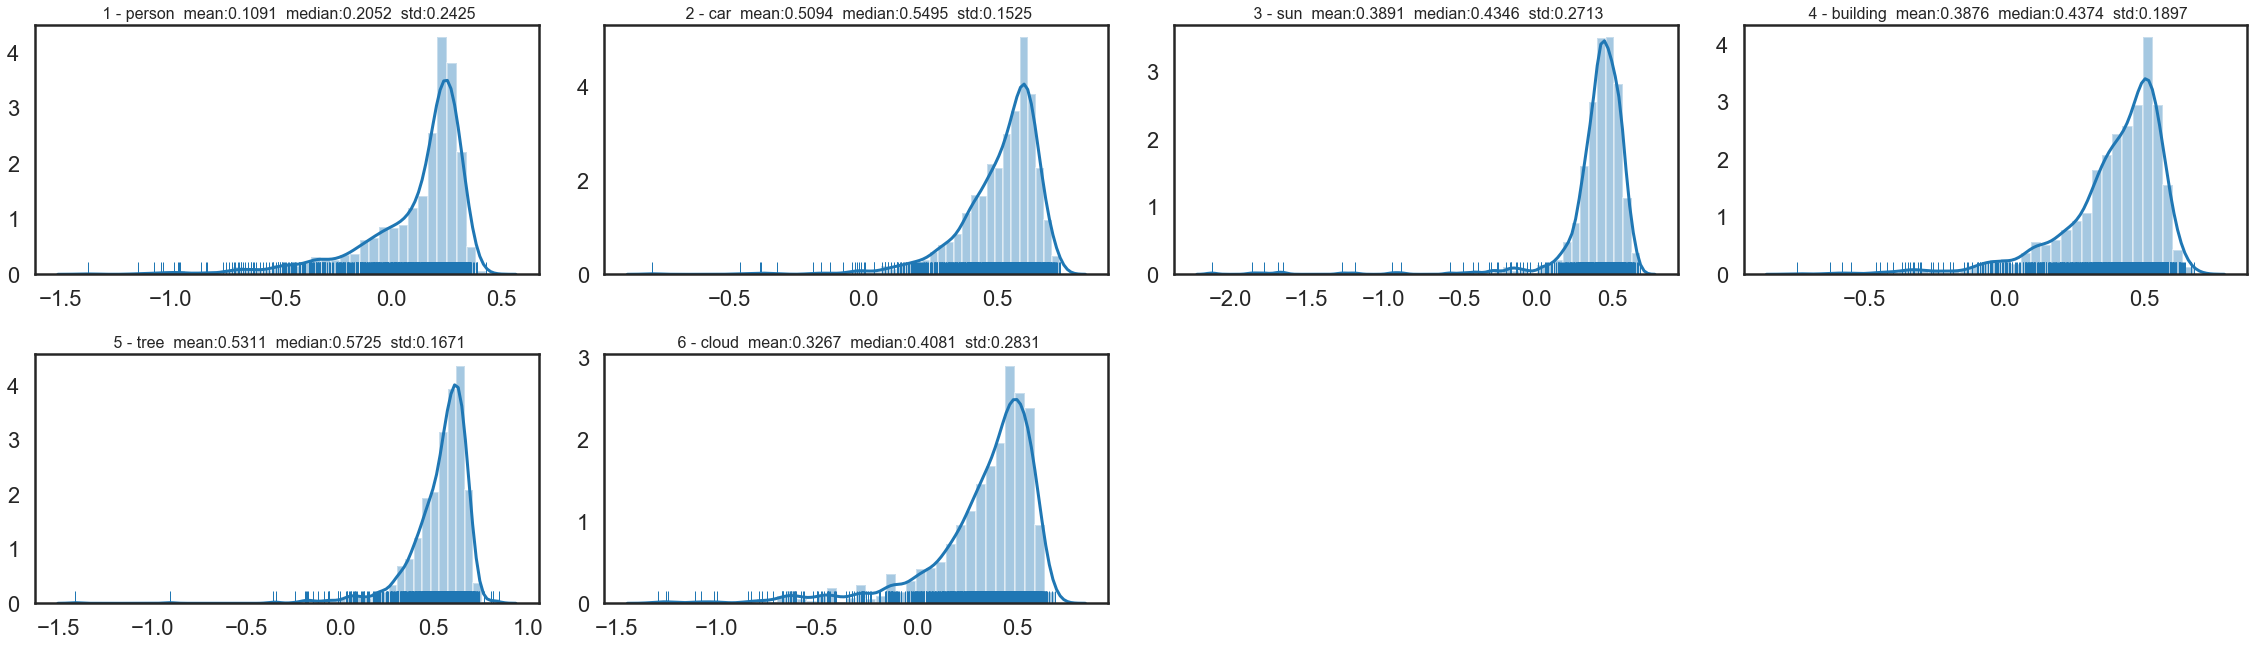

In [46]:
cmap.plot_score_distribution(cls_info, 'fcn_score_1')

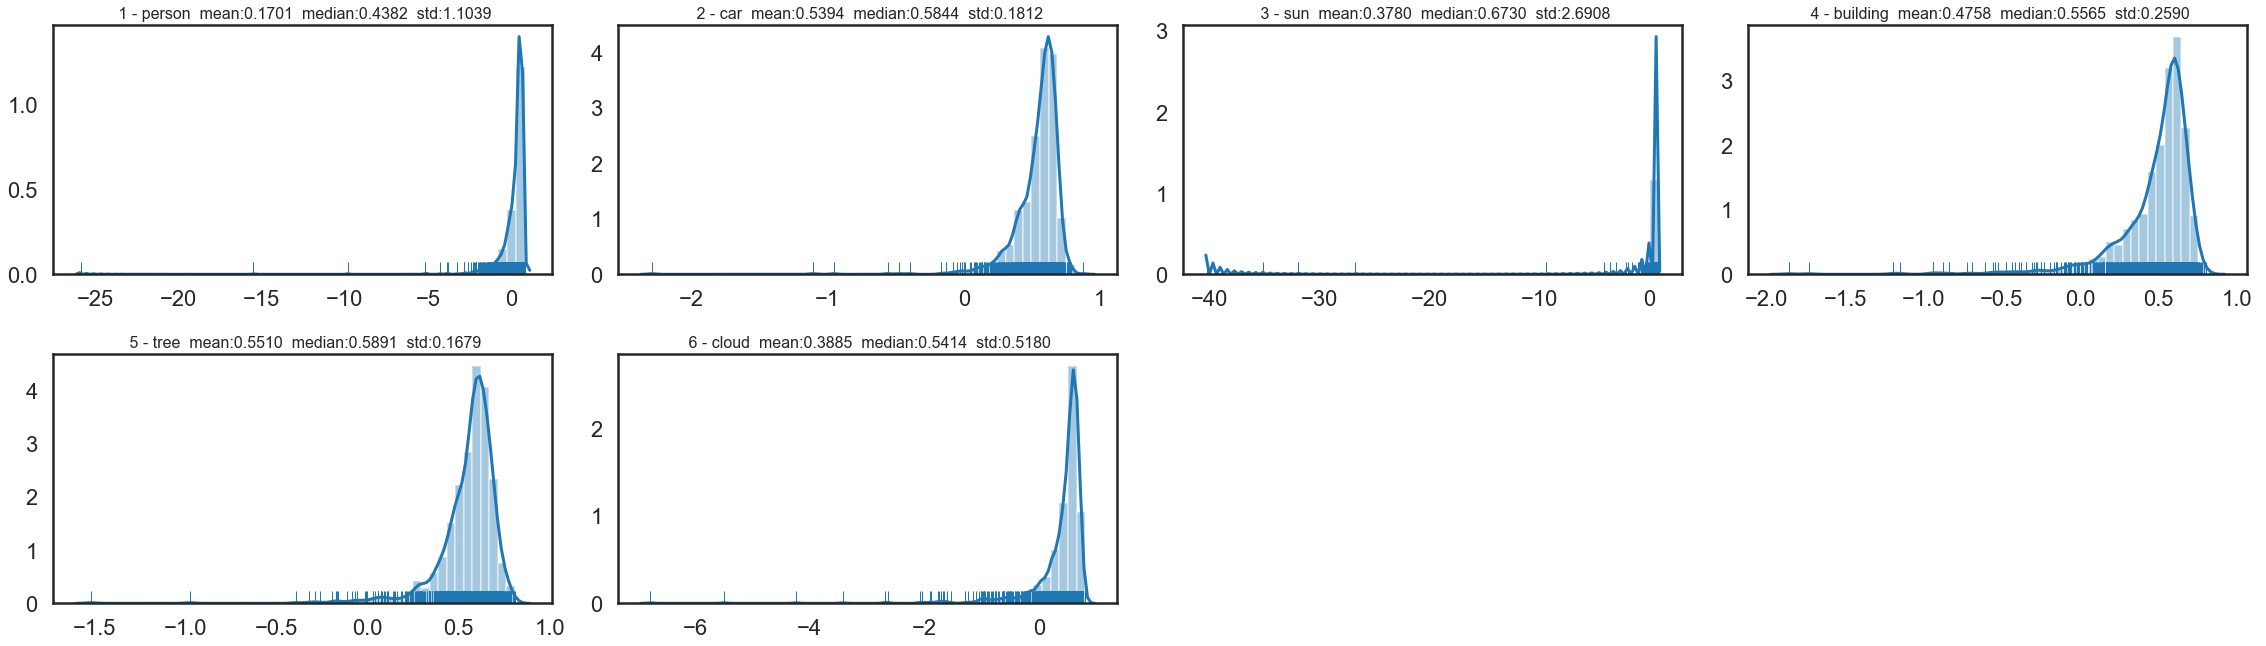

In [47]:
cmap.plot_score_distribution(cls_info, 'fcn_score_2')

## Barchart - AP vs. IoU Threshold for various scores 

 Num disp classes 1  Columns:  1  Rows:  1


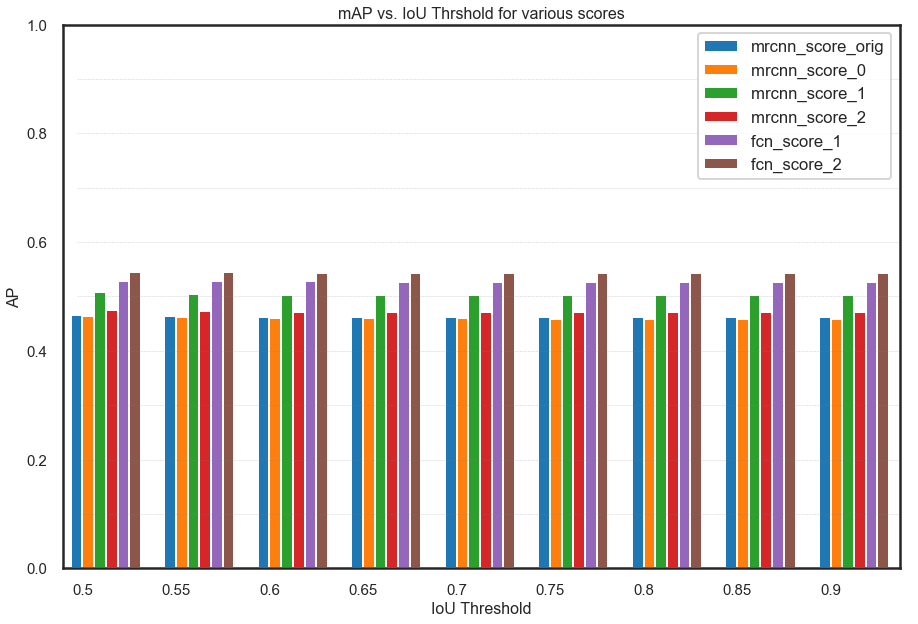


                                                  AP @ IoU Thresholds for computed scores                                                   

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Score -                           0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
mrcnn_score_orig                  0.4667     0.4645     0.4631     0.4627     0.4623     0.4620     0.4620     0.4618     0.4617     %46.30 
mrcnn_score_0                     0.4633     0.4618     0.4607     0.4605     0.4596     0.4595     0.4595     0.4595     0.4595     %46.04 
mrcnn_score_1                     0.5082     0.5048     0.5037     0.5035     0.5029     0.5027     0.5027     0.5027     0.5025     %50.38 
mrcnn_score_2

In [109]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2',  'fcn_score_1', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]
cmap.plot_mAP_vs_IoUs_BarChart(all_data, disp_scores, class_ids= [0])# , disp_ious)

## Barchart mAP vs. Class for different scores `plot_mAP_vs_class()`

In [5]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_1', 'fcn_score_2']
disp_scores  = ['mrcnn_score_orig','mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']
disp_ious    = [0.5 , 0.75, 0.9]

<class 'dict'>
loaded : eval2_map_info_epoch4345.pkl     eval2_cls_info_epoch4345_500.pkl
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


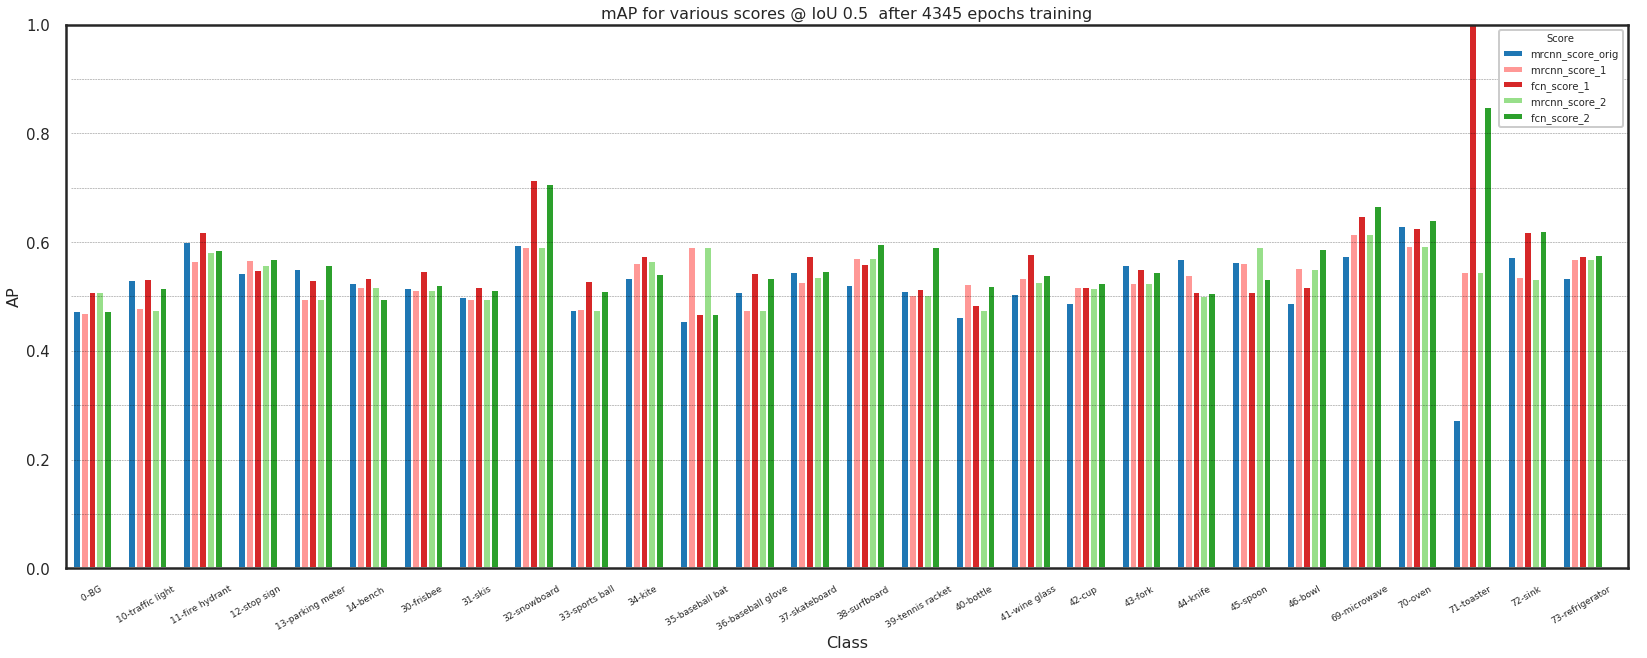


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 4345 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 53.05%            47.88%            53.28%            47.55%            51.57% 
11 - fire hydrant                  60.03%            56.46%            61.80%            58.19%            58.55% 
12 - stop sign                     54.33%            56.68%            54.78%            55.70%            56.83% 
13 - parking meter                 54.97%            49.48%            53.06%            49.48%            55.85% 
1

In [9]:
epoch = 4345
all_data, _ = cmap.load_info_files(MAP_PATH, 'eval2',epoch)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5, epochs = epoch)# , disp_ious)

disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


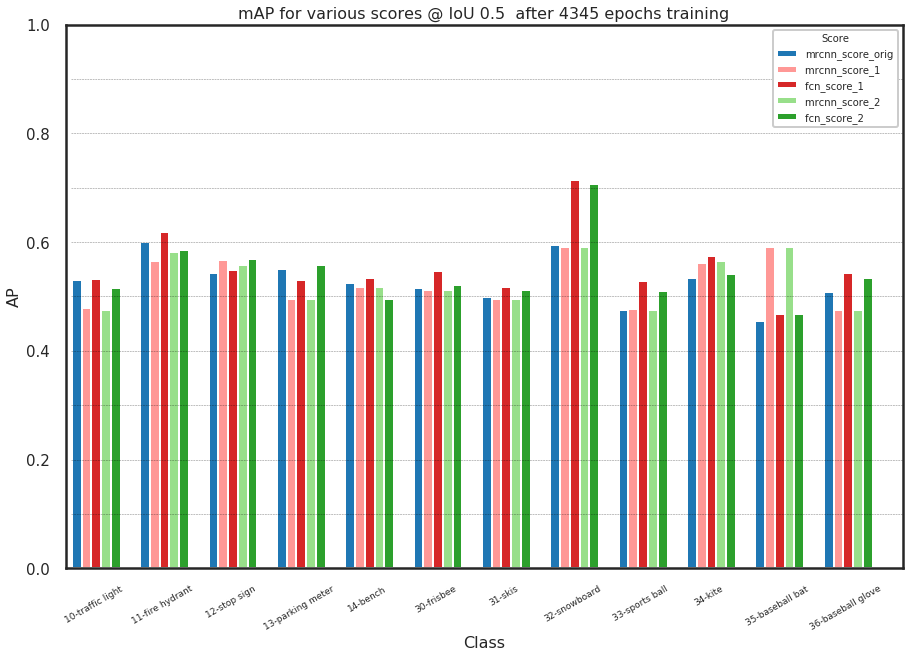


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 4345 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 53.05%            47.88%            53.28%            47.55%            51.57% 
11 - fire hydrant                  60.03%            56.46%            61.80%            58.19%            58.55% 
12 - stop sign                     54.33%            56.68%            54.78%            55.70%            56.83% 
13 - parking meter                 54.97%            49.48%            53.06%            49.48%            55.85% 
1

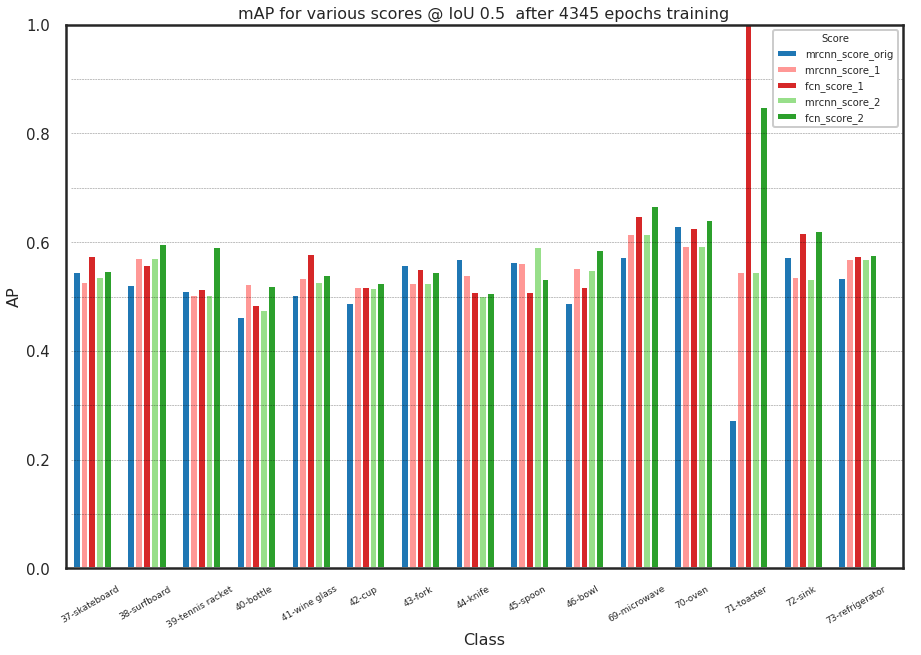


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 4345 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
37 - skateboard                    54.55%            52.71%            57.39%            53.53%            54.75% 
38 - surfboard                     52.12%            57.16%            55.89%            57.16%            59.58% 
39 - tennis racket                 51.07%            50.33%            51.35%            50.33%            59.07% 
40 - bottle                        46.19%            52.21%            48.50%            47.54%            51.97% 
4

In [10]:
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5, epochs = epoch)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5, epochs = epoch)

In [11]:
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.75)

## Plot combined mAP for different IoU thresholds for each score
(one type of score, e.g. 'scores' - all classes combined)

### `mrcnn_score_orig`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  ALL CLASSES                     46.39%     46.10%     45.90%     45.85%     45.80%     45.75%     45.74%     45.72%     45.71%      %45.88 
--------------------------------------------------------------------------------------------------------------------------------------------


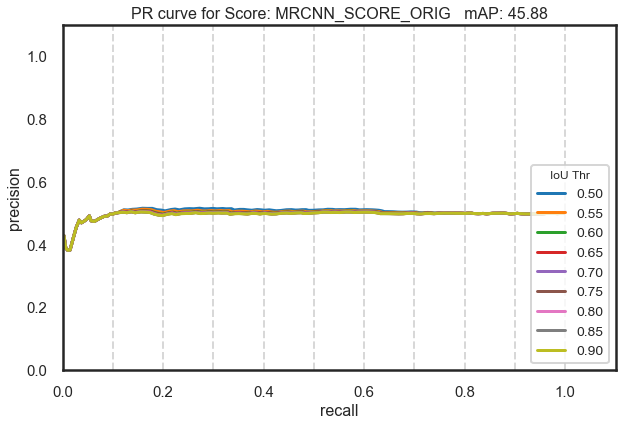

In [90]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig', class_ids = [0], class_names = class_names, columns = 3)

### `mrcnn_score_0`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_0                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4592     0.4571     0.4559     0.4555     0.4550     0.4548     0.4547     0.4547     0.4546      %45.57 



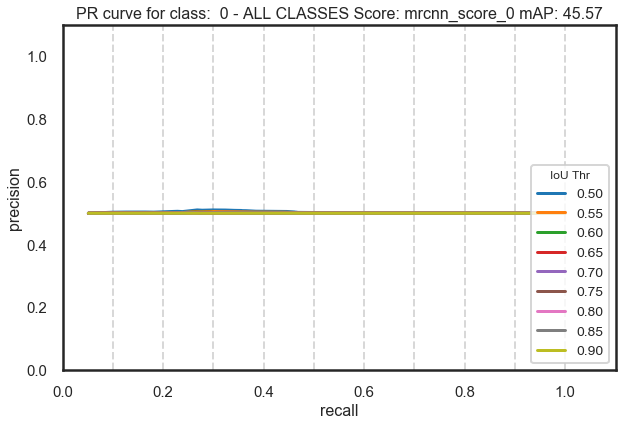

In [19]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0' , class_ids = 0 , class_names = class_names, columns = 3)

### `mrcnn_score_1`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_1                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4612     0.4581     0.4569     0.4567     0.4560     0.4552     0.4551     0.4551     0.4545      %45.65 



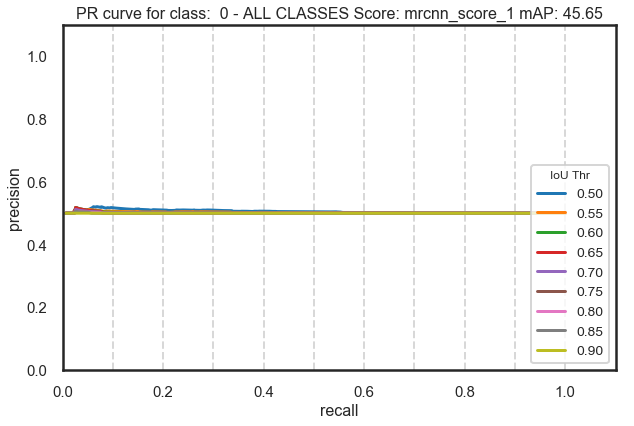

In [20]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1' , class_ids = 0 ,class_names = class_names, columns = 3)

### `mrcnn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_2                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4740     0.4714     0.4705     0.4703     0.4701     0.4699     0.4699     0.4699     0.4699      %47.07 



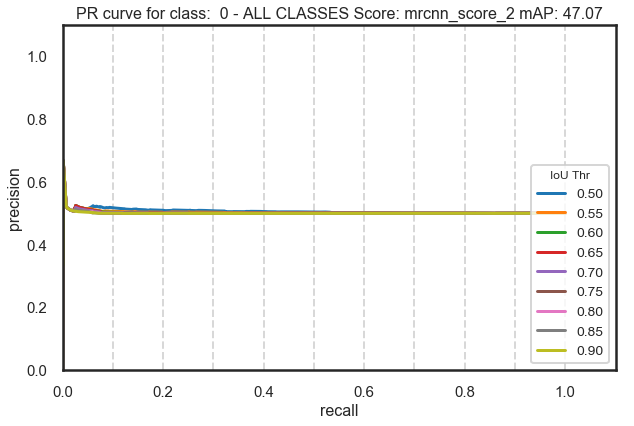

In [21]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2' , class_ids = 0 ,class_names = class_names, columns = 3)

### `mrcnn_score_norm`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_norm                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4572     0.4563     0.4555     0.4552     0.4547     0.4547     0.4547     0.4547     0.4545      %45.53 



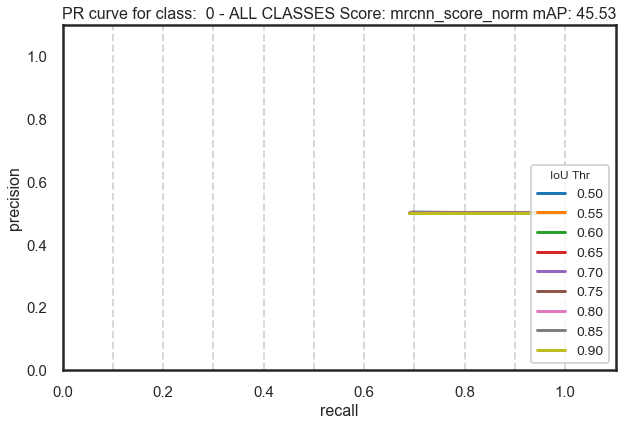

In [22]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_norm' , class_ids = 0 ,class_names = class_names, columns = 3)

### `fcn_score_0`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_0                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.4840     0.4835     0.4832     0.4831     0.4829     0.4829     0.4827     0.4827     0.4826      %48.31 



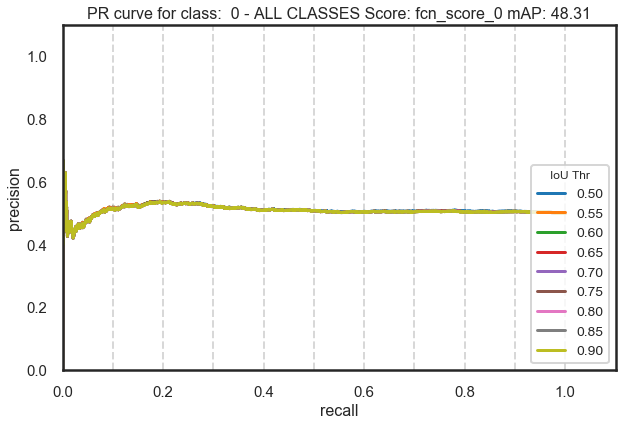

In [23]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_0' , class_ids = 0 , class_names = class_names,columns = 3)

### `fcn_score_1`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_1                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  ALL CLASSES                     53.49%     53.35%     53.26%     53.24%     53.17%     53.15%     53.15%     53.13%     53.12%      %53.23 
--------------------------------------------------------------------------------------------------------------------------------------------


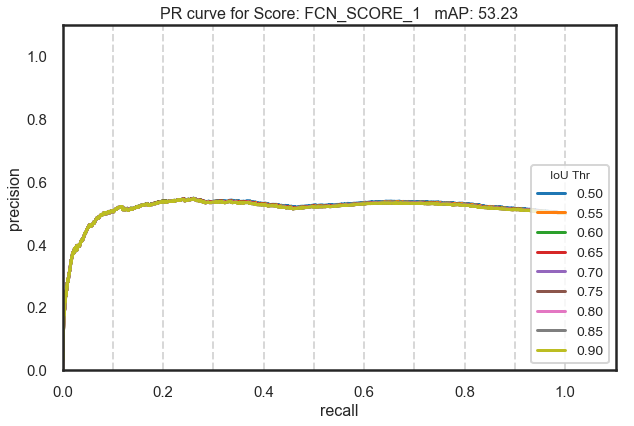

In [22]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1' , class_ids = 0 , class_names = class_names,columns = 3)

### `fcn_score_2`

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  ALL CLASSES                     58.85%     58.75%     58.71%     58.70%     58.64%     58.64%     58.63%     58.61%     58.61%      %58.68 
--------------------------------------------------------------------------------------------------------------------------------------------


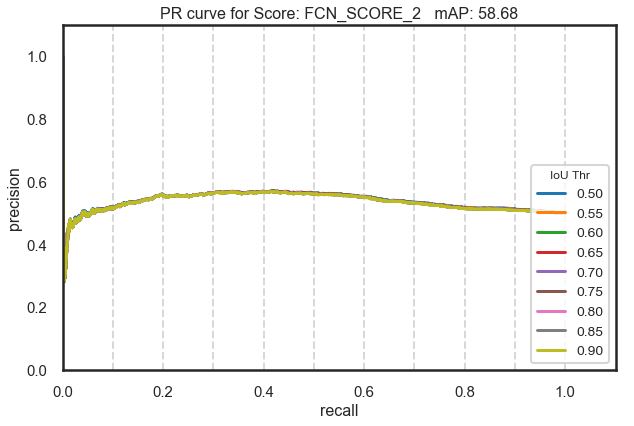

In [89]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2' , class_ids = 0 , class_names = class_names,columns = 3)

## Plot combined mAP info for different scores (at a given IoU threshold, all classes combined)


                                                               AP @ IoU 0.50 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig  mrcnn_score_norm     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        46.39%            45.66%            46.44%            46.26%            47.52%            55.73%            53.47%            58.85%
-----------------------------------------------------------------------------------------------------------------------------------------------------

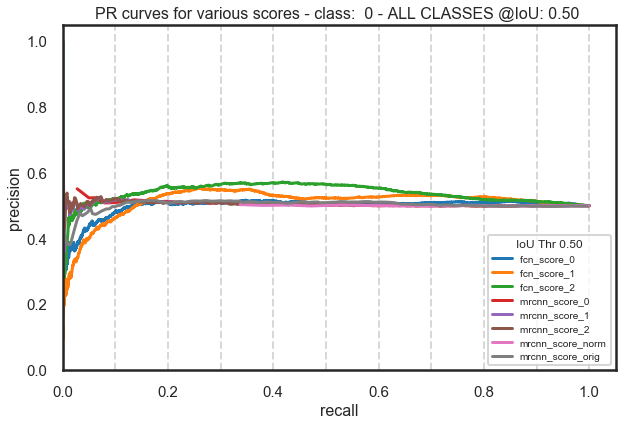

In [93]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2' ,'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names,iou = 0.50)


                                                               AP @ IoU 0.85 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig  mrcnn_score_norm     mrcnn_score_0     mrcnn_score_1       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ALL CLASSES                        45.72%            45.48%            46.09%            45.82%            55.59%            53.17%            58.61%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


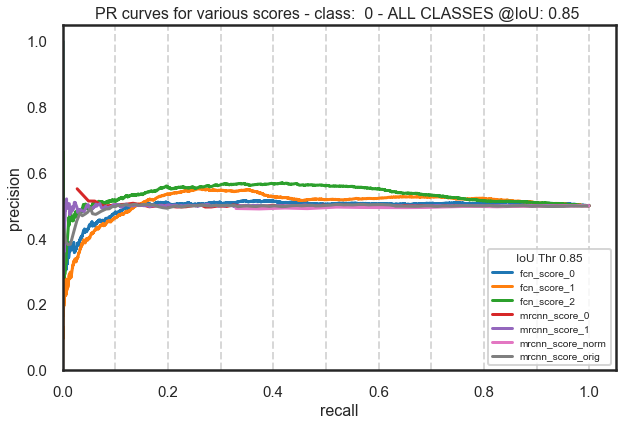

In [92]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names, iou = 0.85)


                                                               AP @ IoU 0.50 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig  mrcnn_score_norm     mrcnn_score_0     mrcnn_score_1       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.4553            0.4554            0.4562            0.4562            0.6297            0.7372            0.7241 
 2 - car                           0.4545            0.4545            0.4550            0.4545            0.5873            0.6327            0.6568 
 3 - sun                         

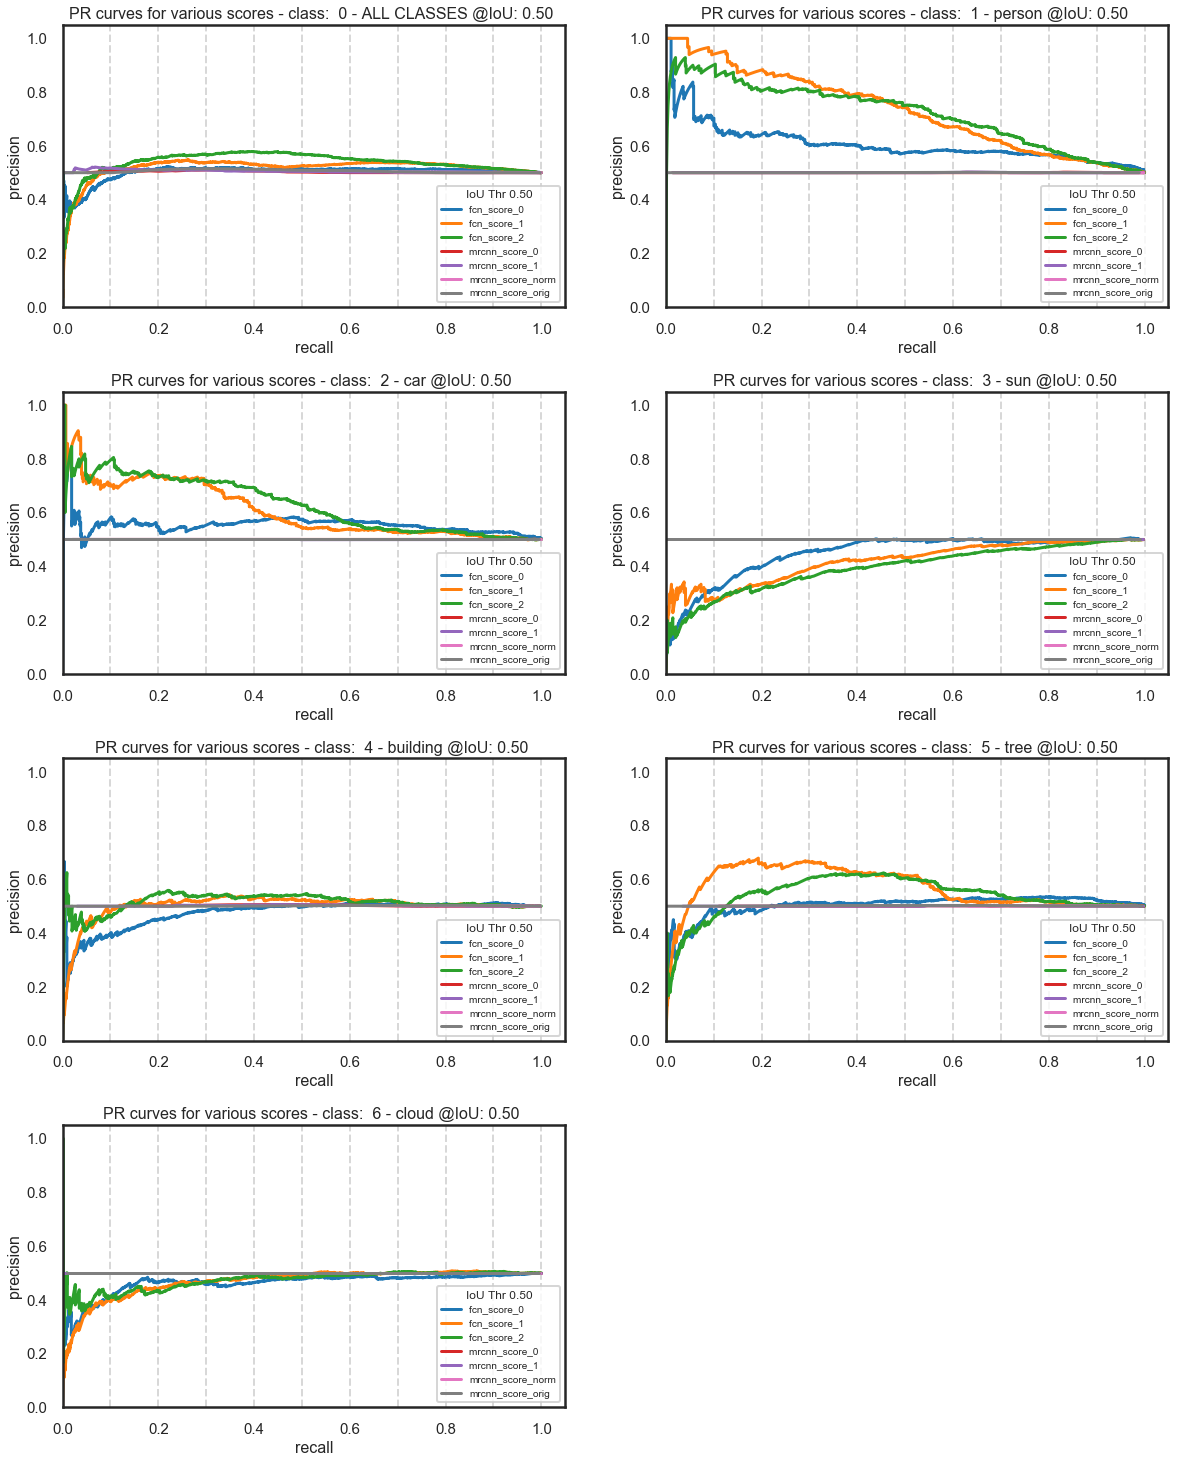

In [26]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores , class_names = class_names, iou = 0.50)


## Indvidual classes - Plot mAP info for  at different thresholds (one type of score, e.g. 'scores')

### Plot mAP for `mrcnn_score_orig` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_orig                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.9054     0.9023     0.8921     0.7962     0.7721     0.6545     0.5047     0.2586     0.0795      %64.06 
  1 - person                      0.8084     0.7965     0.6878     0.5307     0.3618     0.1987     0.0708     0.0283     0.0069      %38.78 
  2 - car                         0.9082     0.9066     0.9024     0.8885     0.785

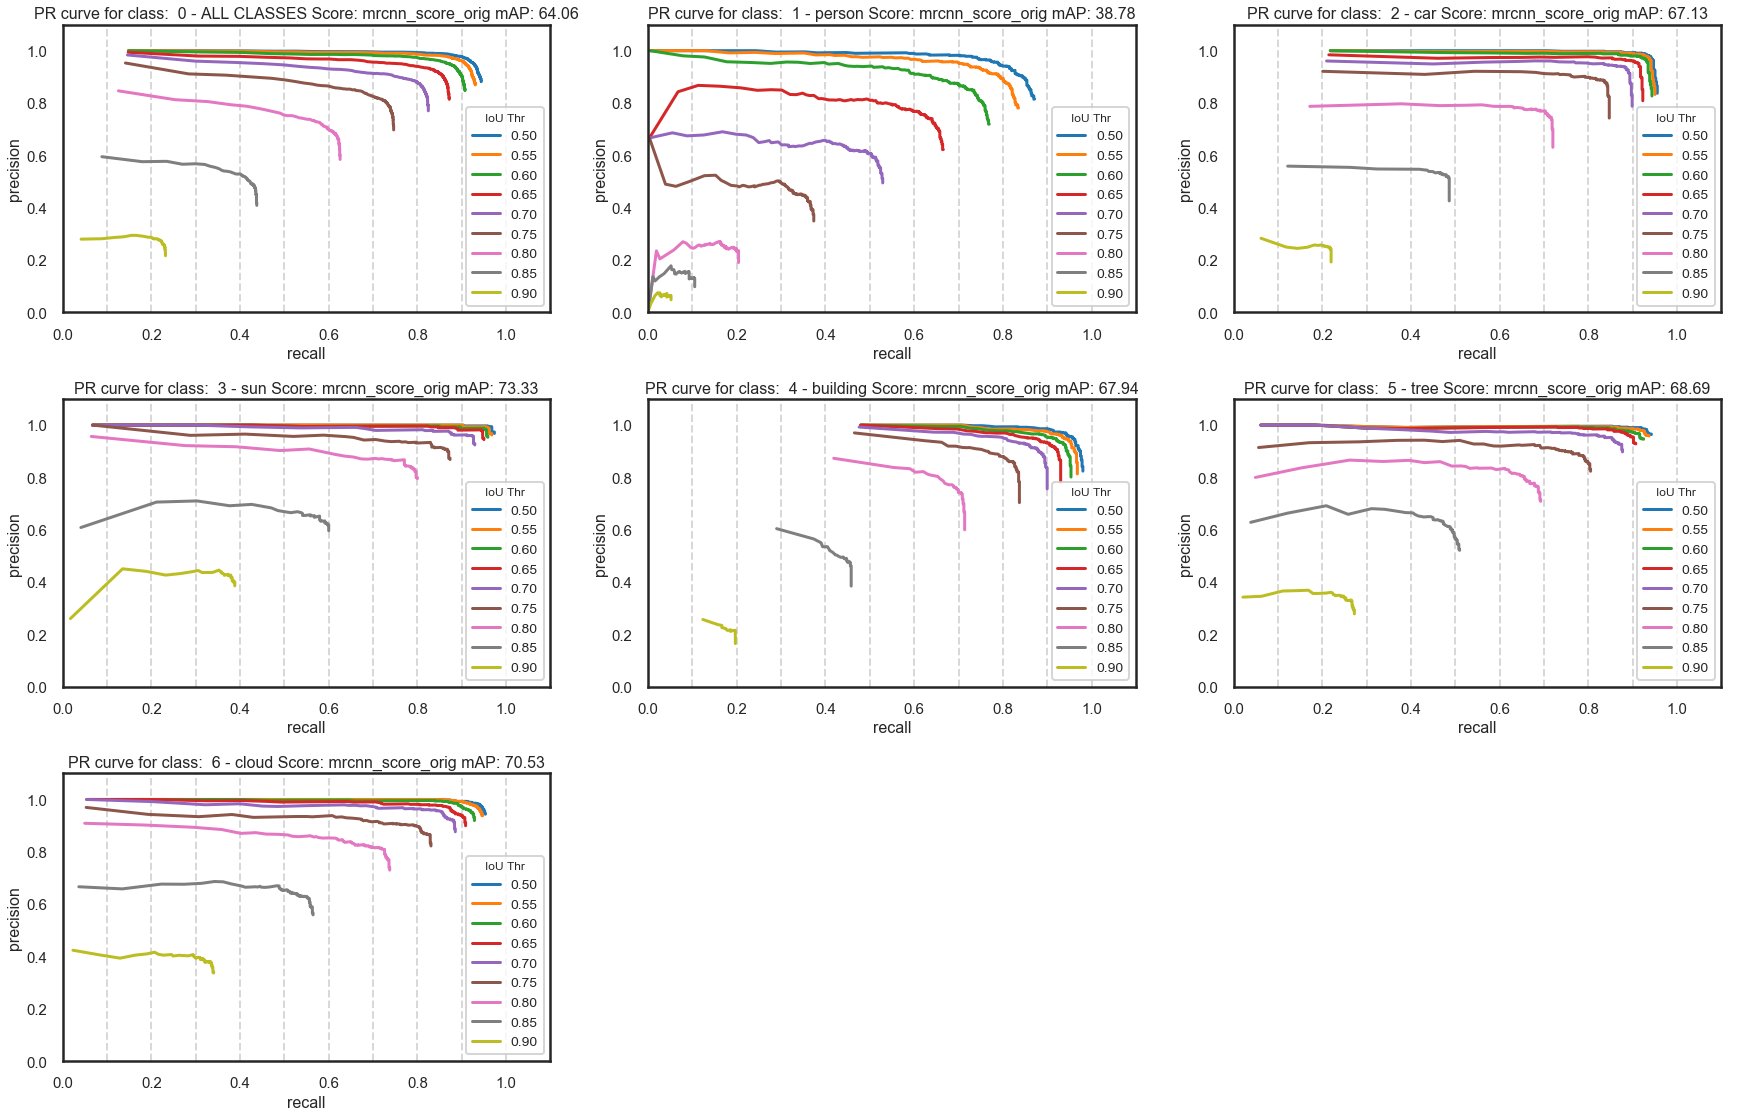

In [199]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig', class_names = class_names )

### Plot mAP for `mrcnn_score_norm` for different IoU thresholds


                                         AP @ IoU Thresholds for Score Computation: mrcnn_score_norm                                        

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.7777     0.7569     0.6442     0.4946     0.3545     0.1565     0.0654     0.0264     0.0050      %36.46 
  2 - car                         0.8921     0.8852     0.8817     0.8759     0.7737     0.7111     0.4763     0.2429     0.0719      %64.56 
  3 - sun                         0.9062     0.9062     0.8977     0.8919     0.8634     0.8205     0.5786     0.3862     0.1338      %70.94 
  4 - buil

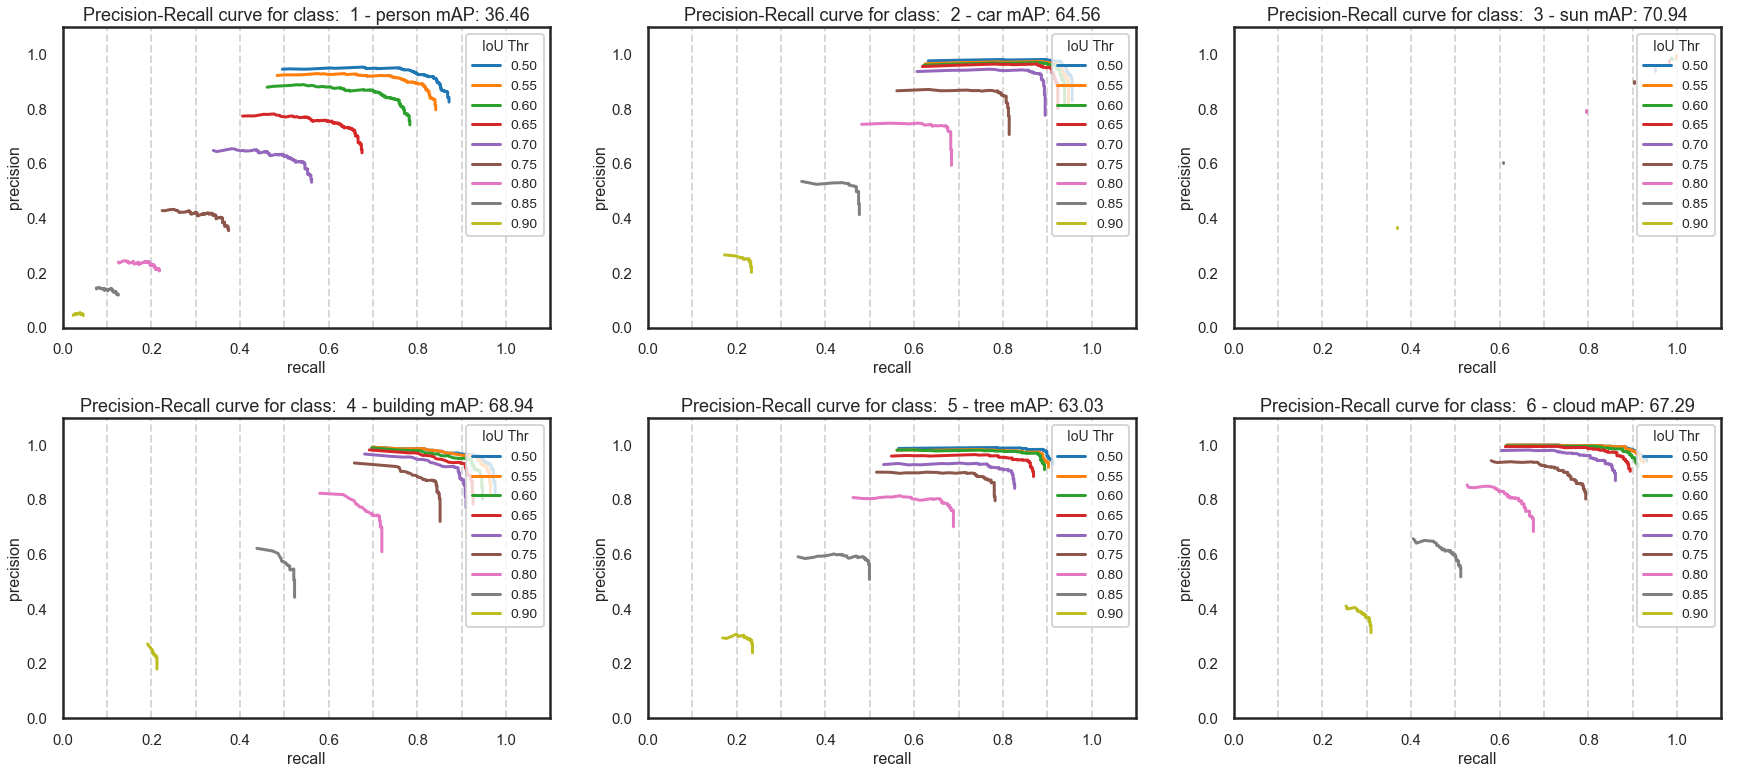

In [163]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_norm')

### Plot mAP for `mrcnn_score_0` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_0                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  0 - ALL CLASSES                 0.8912     0.8870     0.8770     0.7862     0.7696     0.6493     0.5006     0.2566     0.0779      %63.28 
  1 - person                      0.7774     0.7507     0.6410     0.5154     0.3580     0.1734     0.0717     0.0244     0.0061      %36.87 
  2 - car                         0.8851     0.8819     0.8780     0.8694     0.766

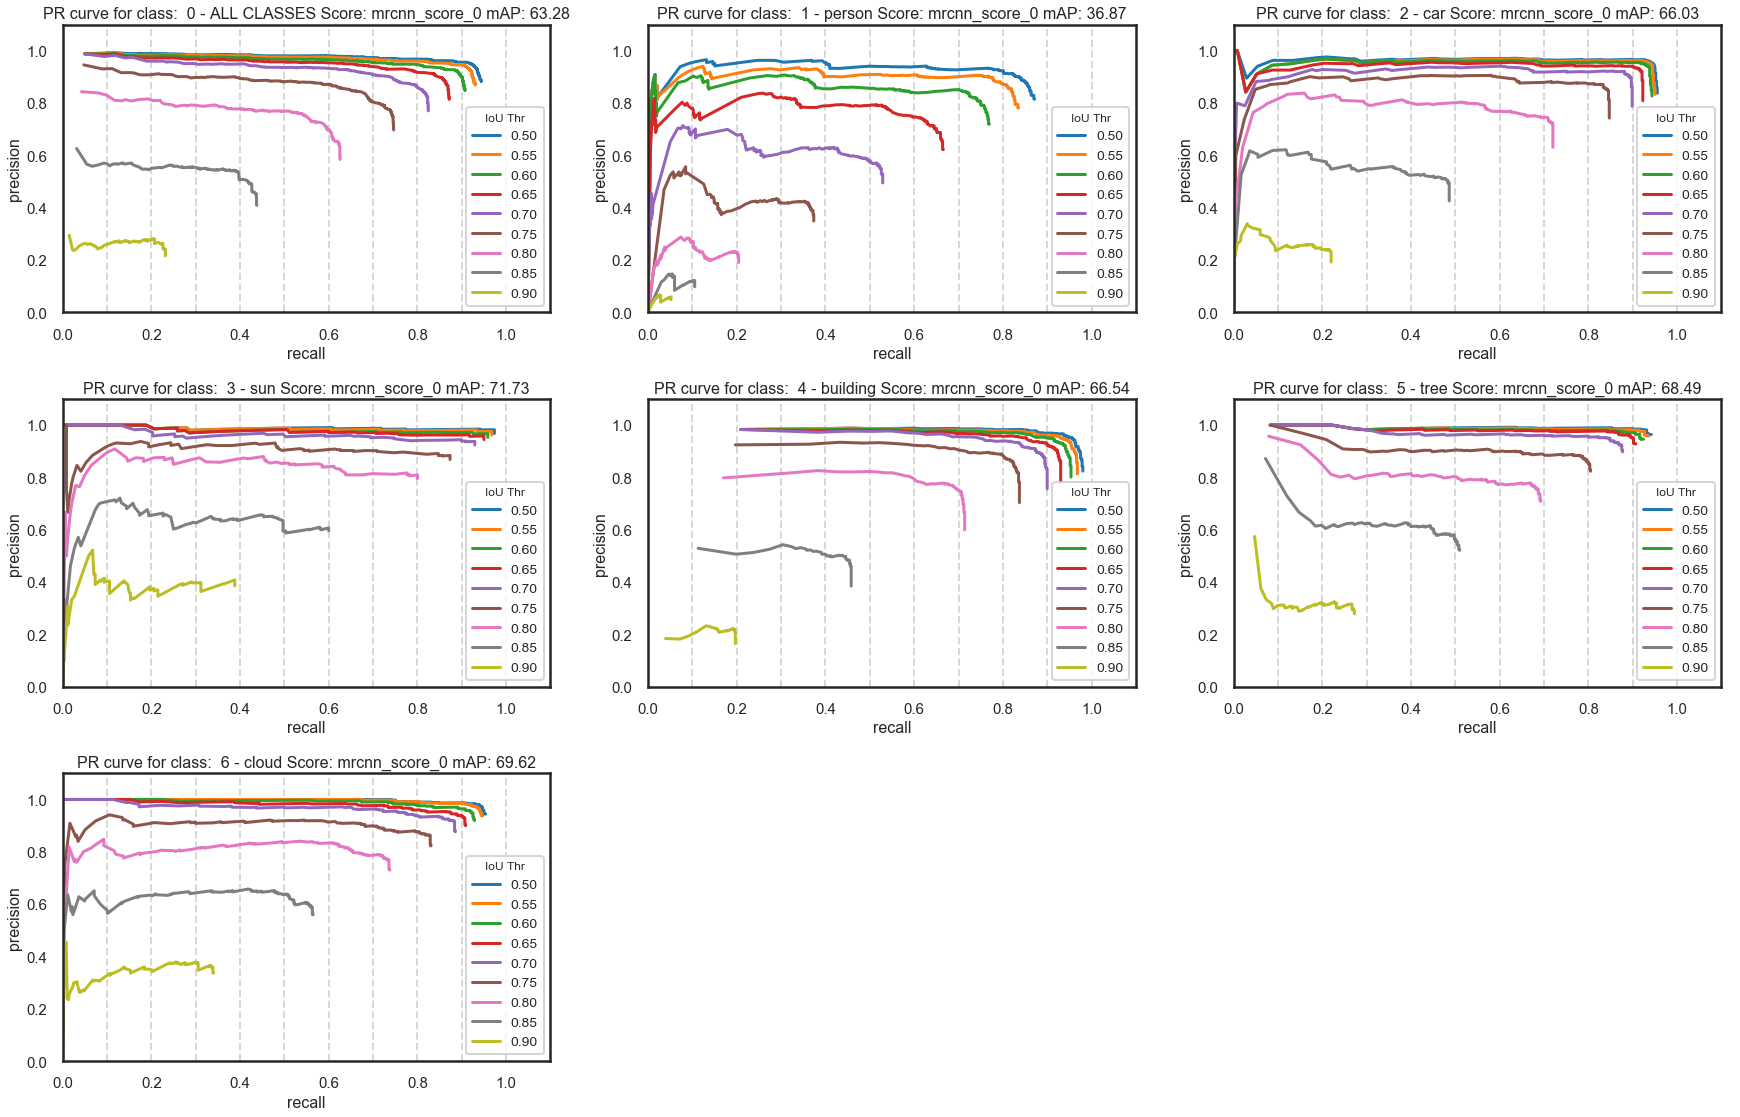

In [201]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0', class_names = class_names )

### Plot mAP for `mrcnn_score_1` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_1                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.4563     0.4563     0.4555     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545      %45.50 
  2 - car                         0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545     0.4545      %45.45 
  3 - sun                         0.4545     0.4545     0.4545     0.4545     0.454

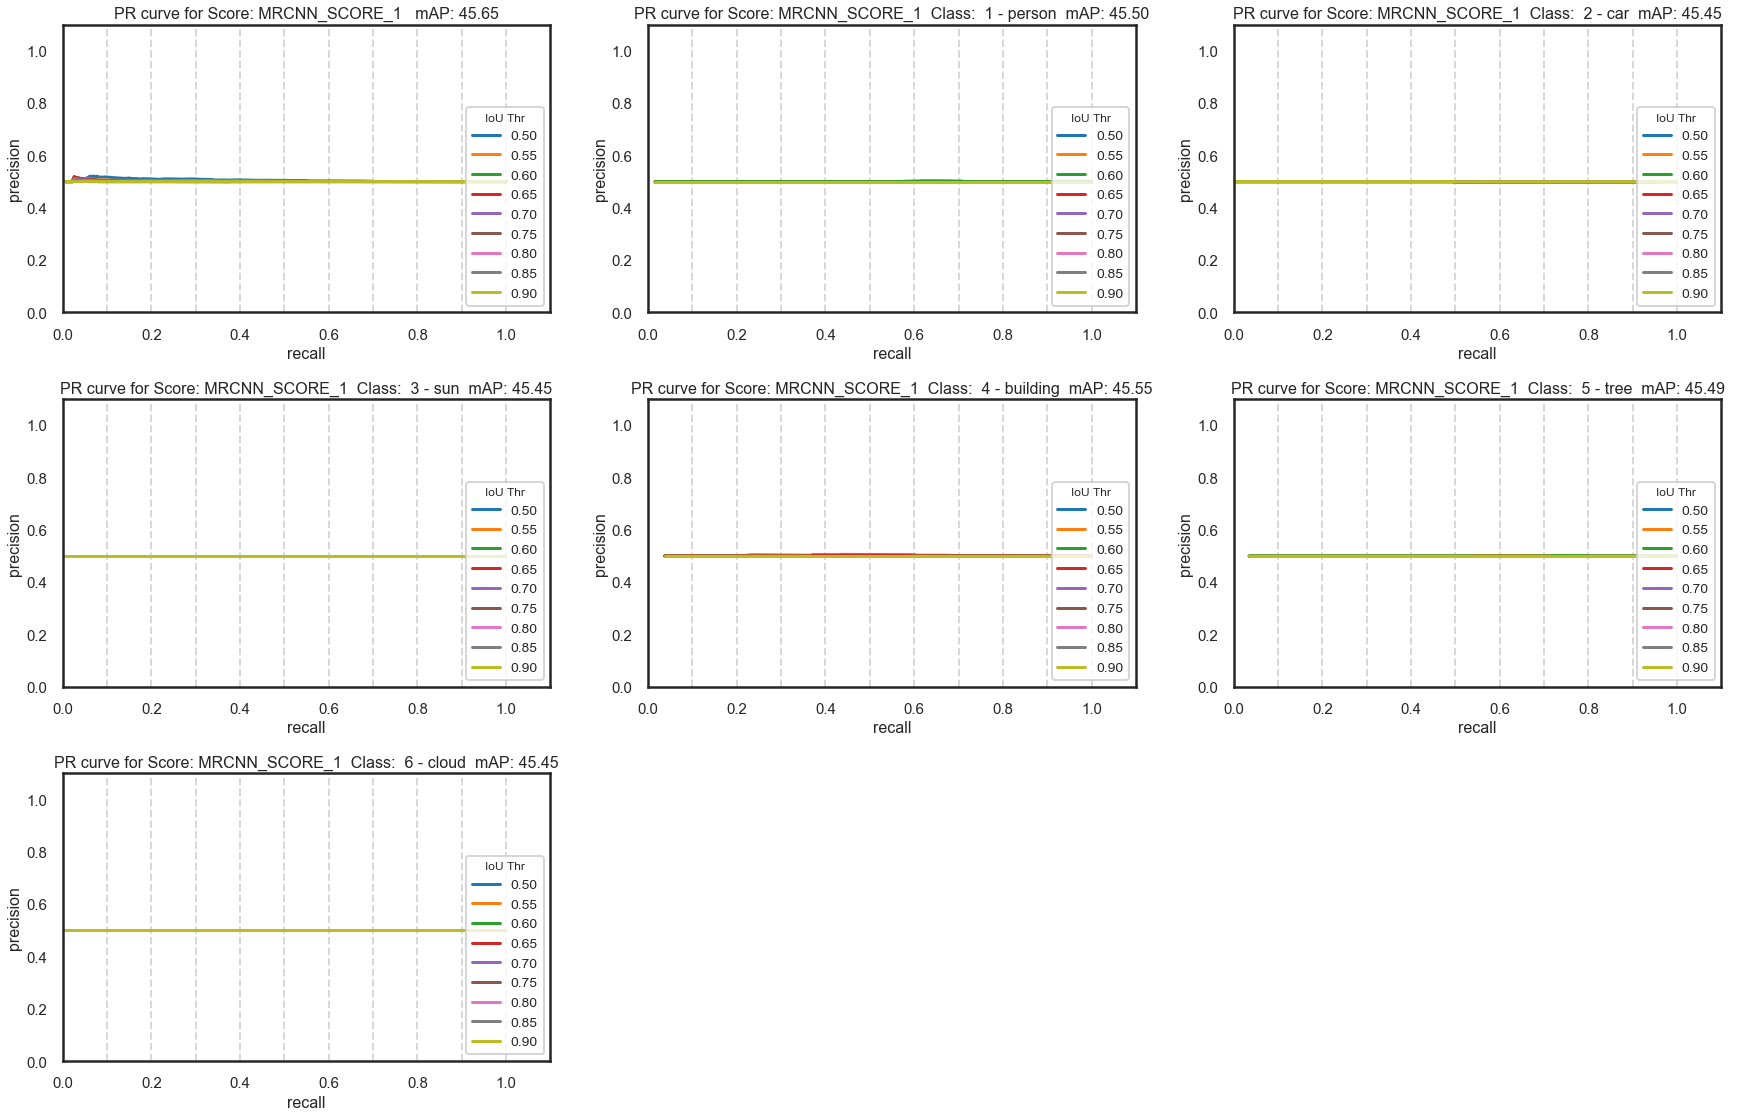

In [145]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1', class_names = class_names )

### Plot mAP for `mrcnn_score_2` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                          AP @ IoU Thresholds for Score Computation: mrcnn_score_2                                          

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.4560     0.4560     0.4560     0.4560     0.4560     0.4560     0.4560     0.4560     0.4560      %45.60 
  2 - car                         0.4549     0.4549     0.4549     0.4549     0.4549     0.4549     0.4549     0.4549     0.4549      %45.49 
  3 - sun                         0.4545     0.4545     0.4545     0.4545     0.454

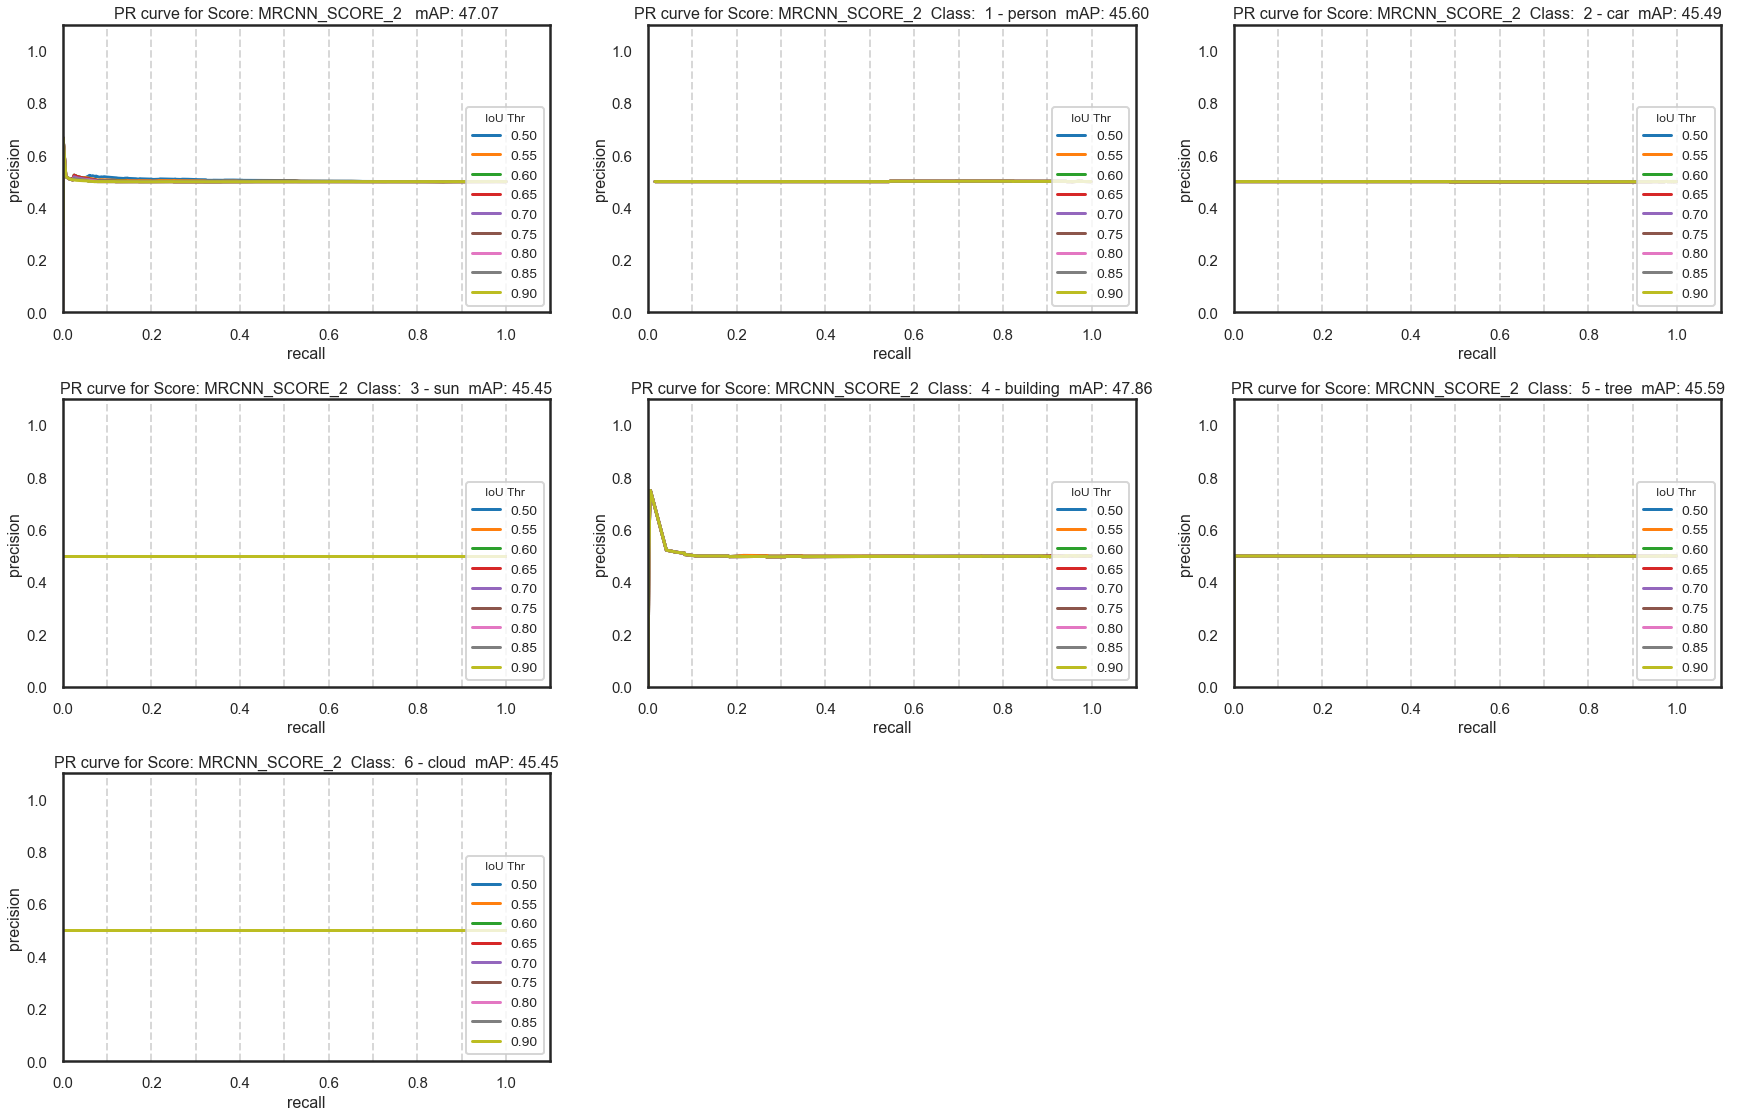

In [146]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2', class_names = class_names )

### Plot mAP for `fcn_score_1` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_1                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.6864     0.6864     0.6856     0.6856     0.6856     0.6856     0.6856     0.6856     0.6856      %68.58 
  2 - car                         0.6158     0.6158     0.6158     0.6158     0.6158     0.6158     0.6158     0.6158     0.6158      %61.58 
  3 - sun                         0.4581     0.4581     0.4581     0.4581     0.458

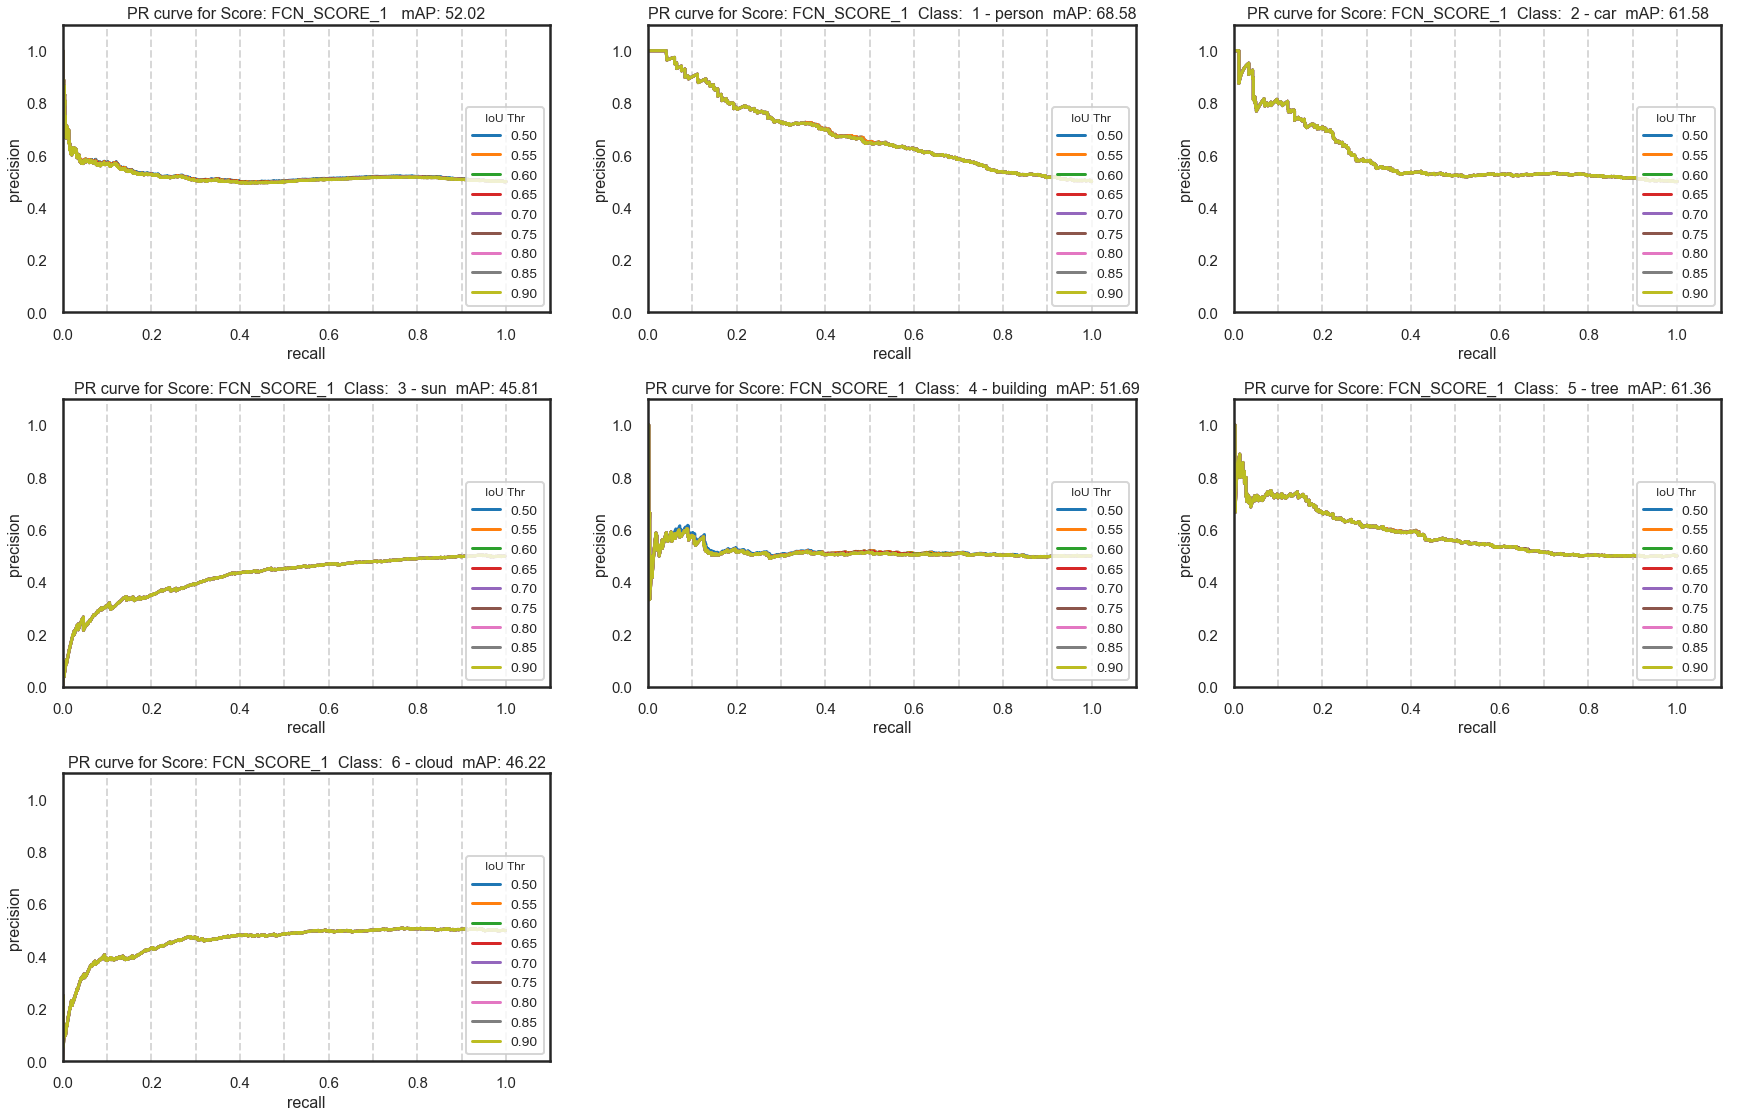

In [30]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1', class_names = class_names )

### Plot mAP for `fcn_score_2` for different IoU thresholds

['ALL CLASSES', 'person', 'car', 'sun', 'building', 'tree', 'cloud']

                                           AP @ IoU Thresholds for Score Computation: fcn_score_2                                           

-------------------------------------------------------------  IoU Thresholds  -------------------------------------------------------------
Id - ClassName                    0.5000     0.5500     0.6000     0.6500     0.7000     0.7500     0.8000     0.8500     0.9000       mAP
--------------------------------------------------------------------------------------------------------------------------------------------
  1 - person                      0.7241     0.7241     0.7241     0.7240     0.7240     0.7240     0.7240     0.7240     0.7240      %72.40 
  2 - car                         0.6568     0.6568     0.6568     0.6559     0.6559     0.6559     0.6559     0.6559     0.6559      %65.62 
  3 - sun                         0.4552     0.4552     0.4552     0.4552     0.455

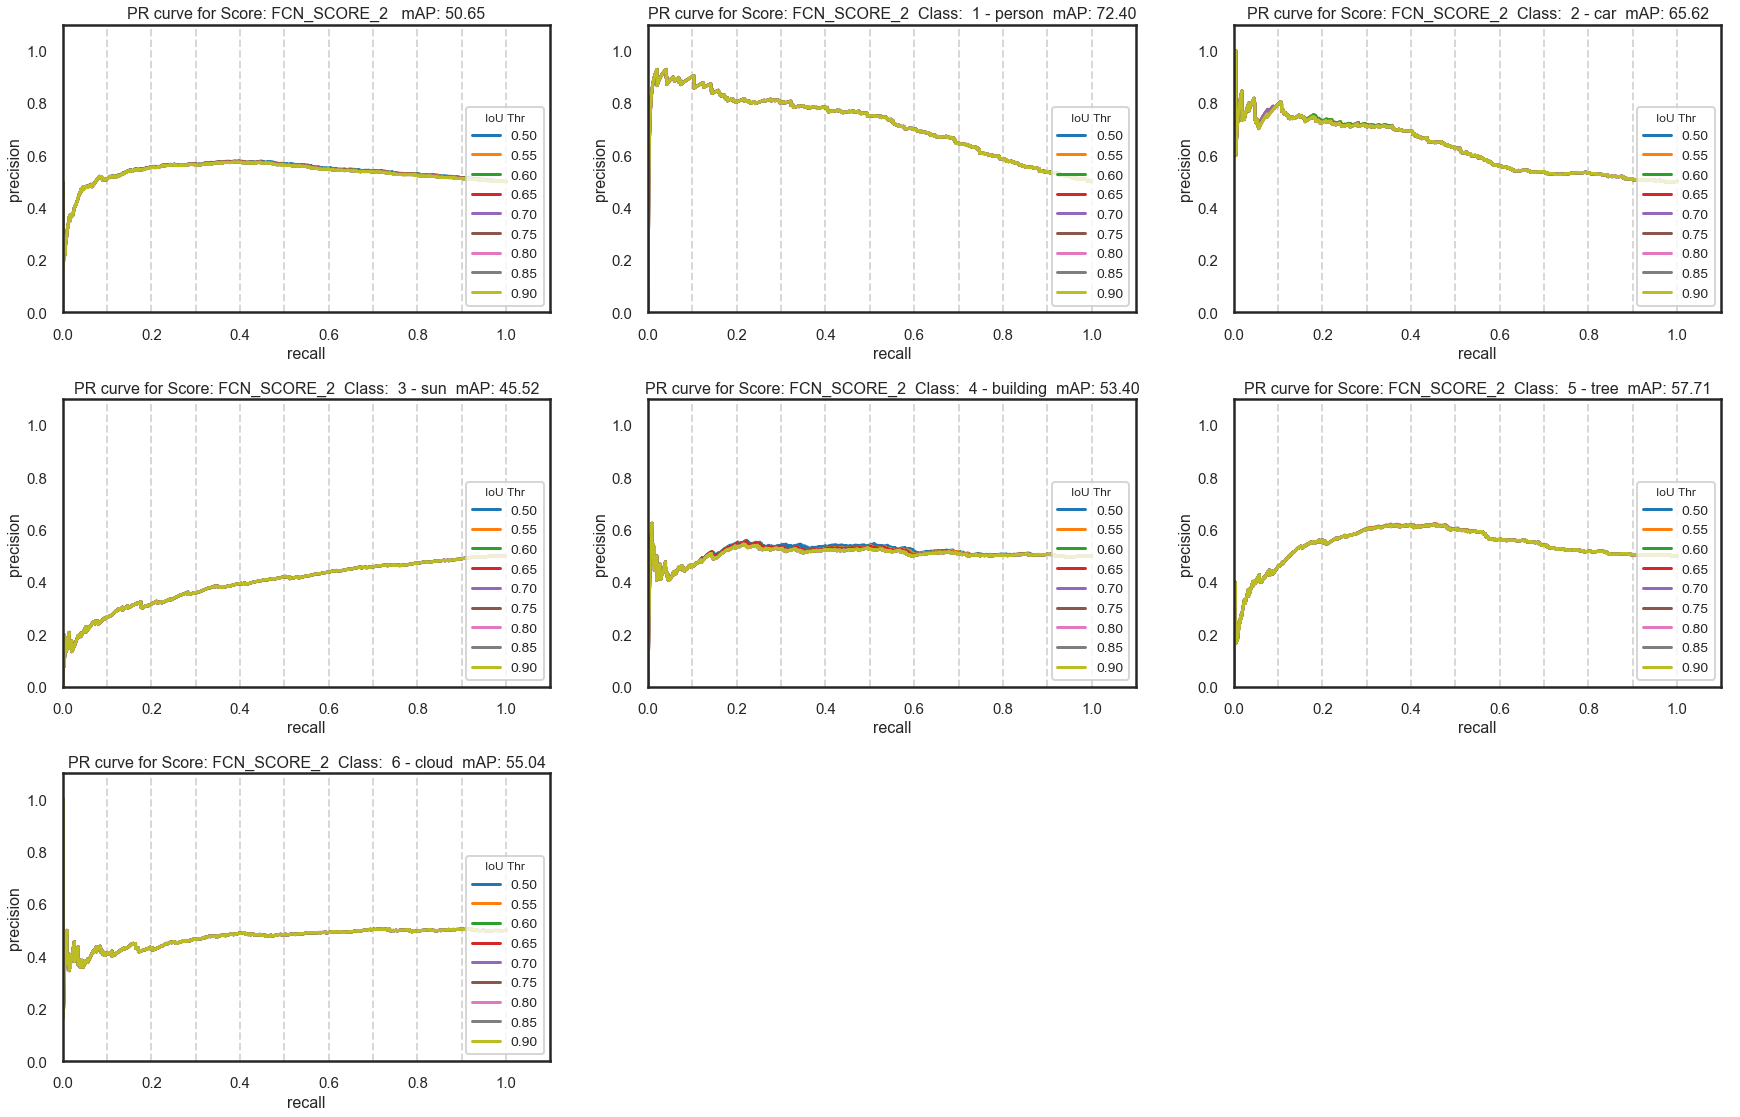

In [27]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2', class_names = class_names )

## Indvidual classes - Plot mAP info for different scores (at a given IoU threshold)

### IoU = 0.5

Epch: 4345
col/rows:  3 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 53.05%            47.88%            53.28% 
11 - fire hydrant                  60.03%            56.46%            61.80% 
12 - stop sign                     54.33%            56.68%            54.78% 
13 - parking meter                 54.97%            49.48%            53.06% 
14 - bench                         52.44%            51.72%            53.40% 
30 - frisbee                       51.57%     

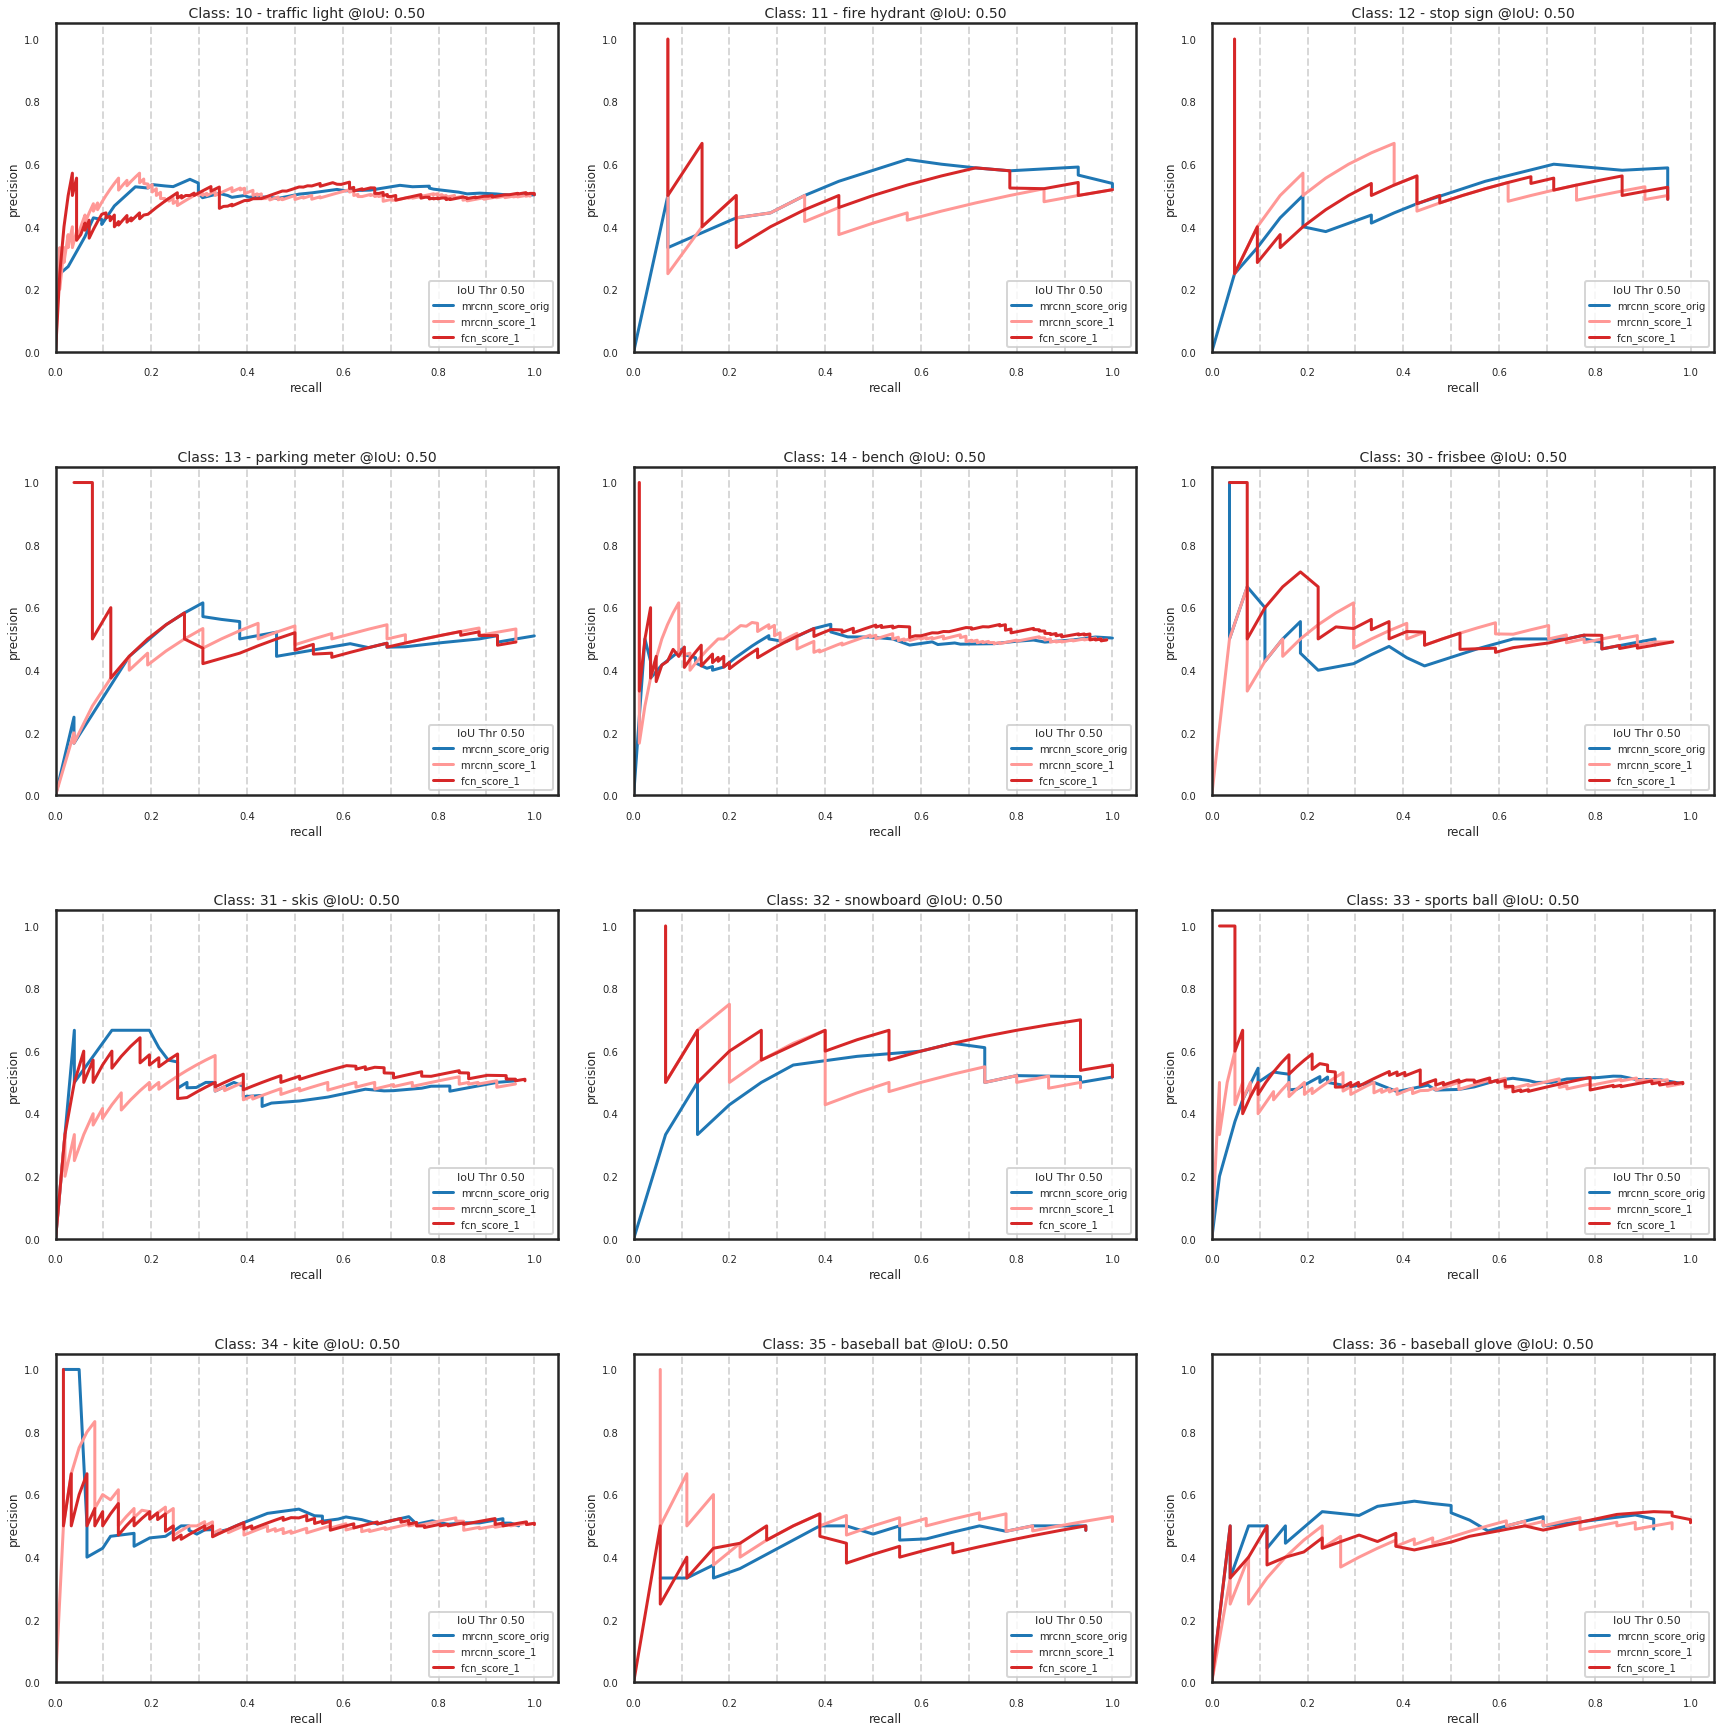

col/rows:  3 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 53.05%            47.55%            51.57% 
11 - fire hydrant                  60.03%            58.19%            58.55% 
12 - stop sign                     54.33%            55.70%            56.83% 
13 - parking meter                 54.97%            49.48%            55.85% 
14 - bench                         52.44%            51.81%            49.52% 
30 - frisbee                       51.57%            51.2

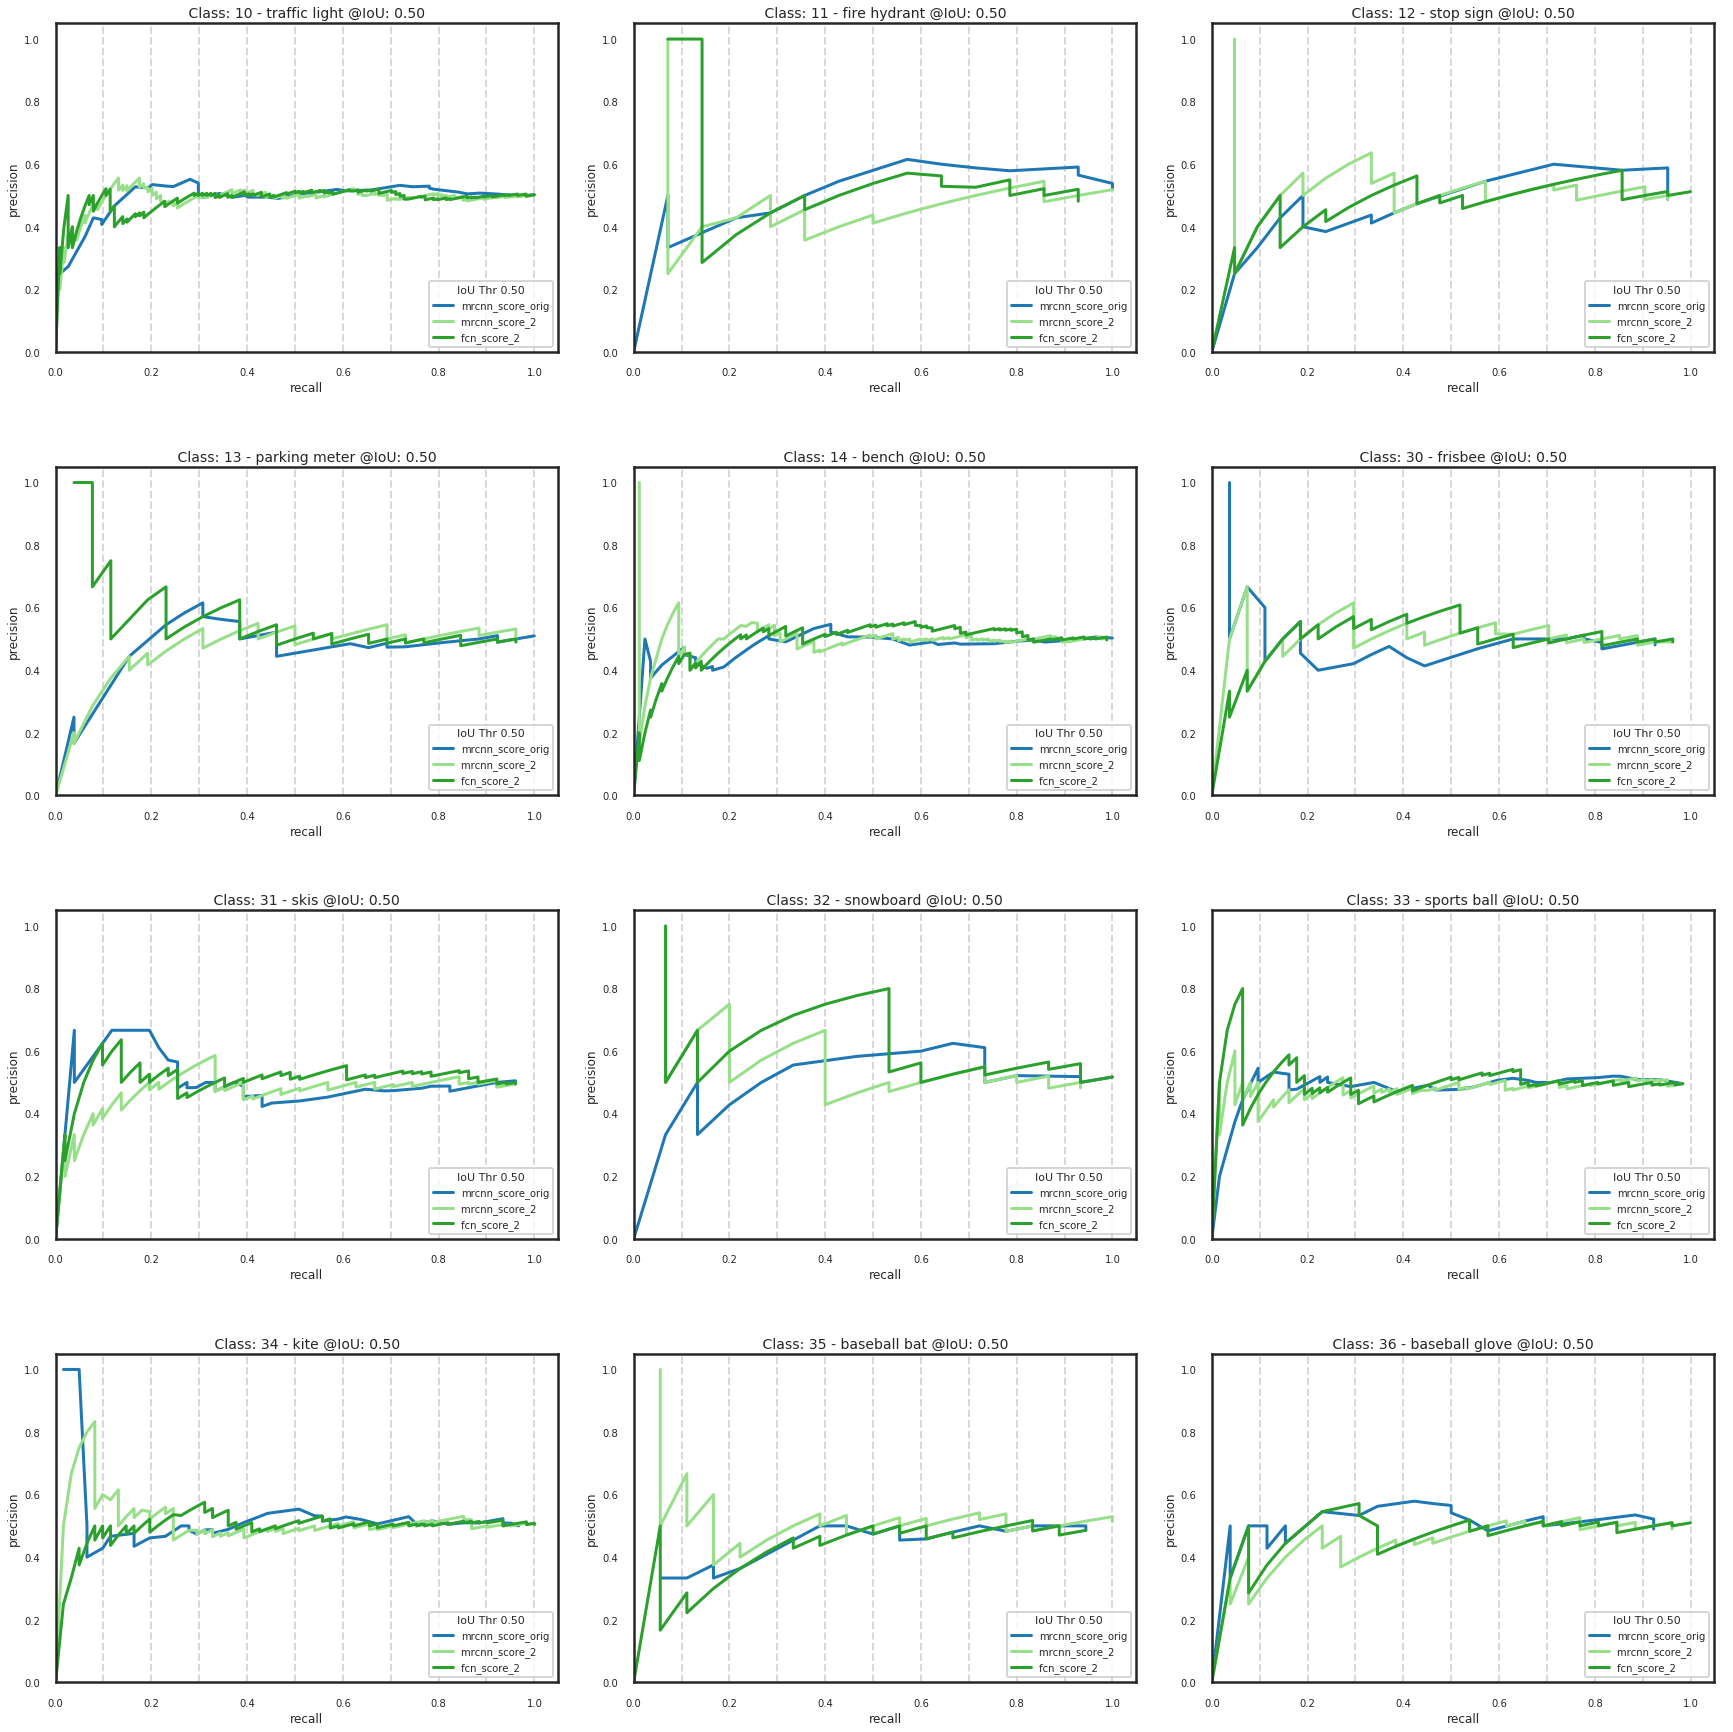

In [12]:
print('Epch:', epoch)
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_1',  'fcn_score_1']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = CLASS_IDS_SG1, class_names= CLASS_NAMES, iou = 0.5, columns = 3)
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_2', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = CLASS_IDS_SG1, class_names= CLASS_NAMES, iou = 0.5, columns = 3)

col/rows:  3 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 0.4942            0.4829            0.4699            0.4762            0.4697            0.0000            0.0000 
11 - fire hydrant                  0.4757            0.5357            0.5646            0.5819            0.5293            0.0000            0.0000 
12 - stop sign                     0.5195            0.5395            0.5176 

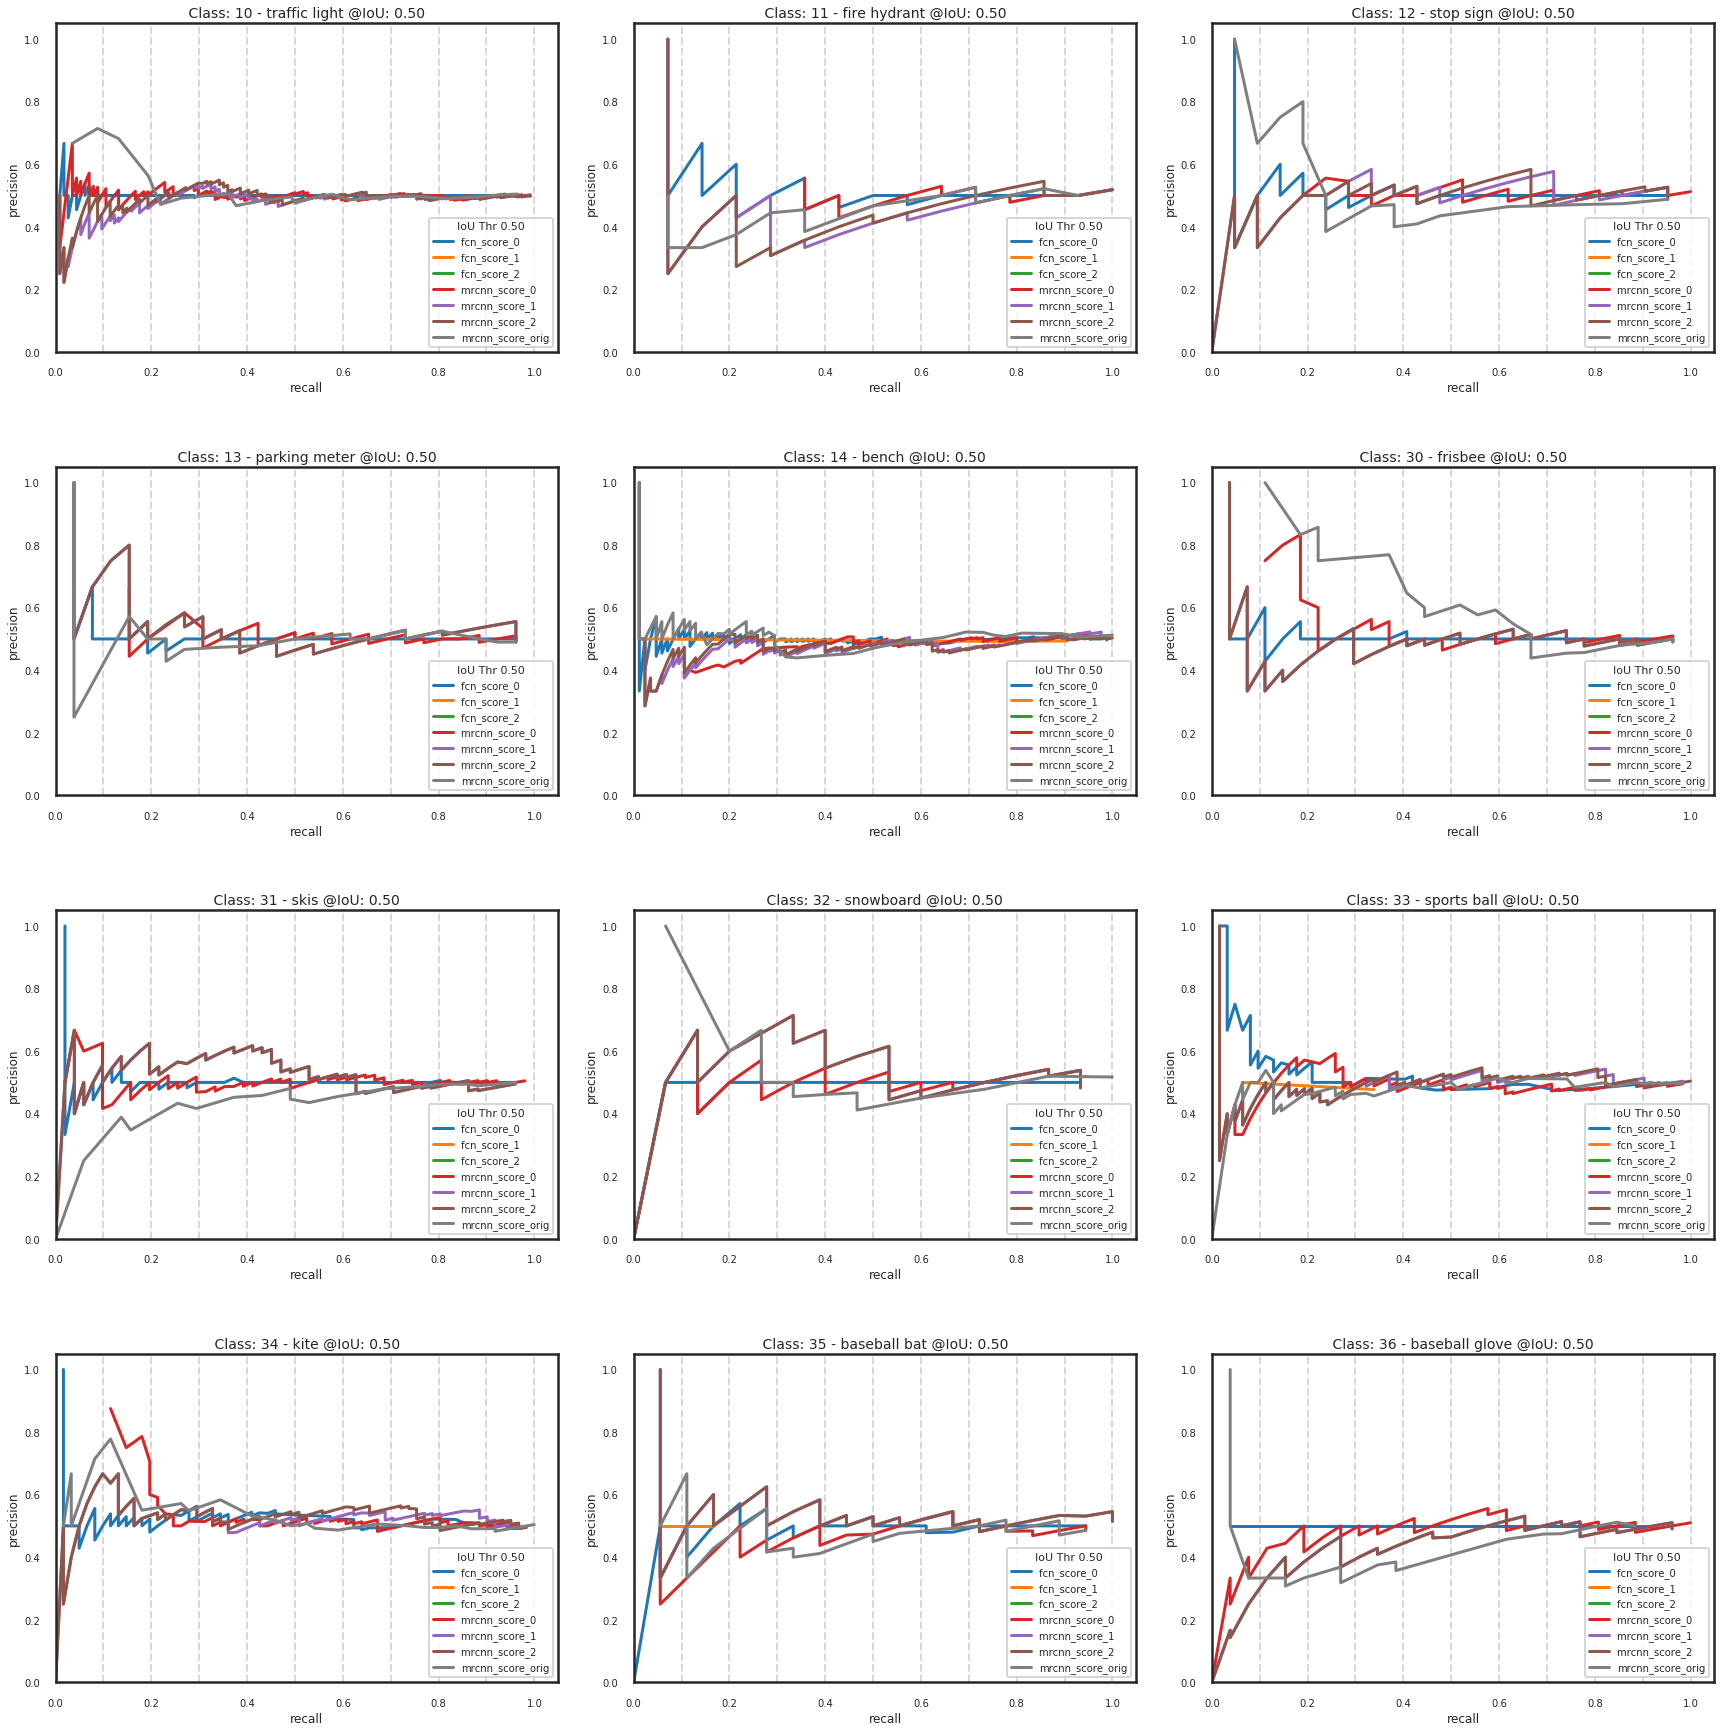

col/rows:  3 5

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
37 - skateboard                    0.5456            0.5189            0.5151            0.5157            0.4834            0.1364            0.0000 
38 - surfboard                     0.4727            0.4700            0.5307            0.5307            0.4730            0.0000            0.0000 
39 - tennis racket                 0.5669            0.5438            0.5730 

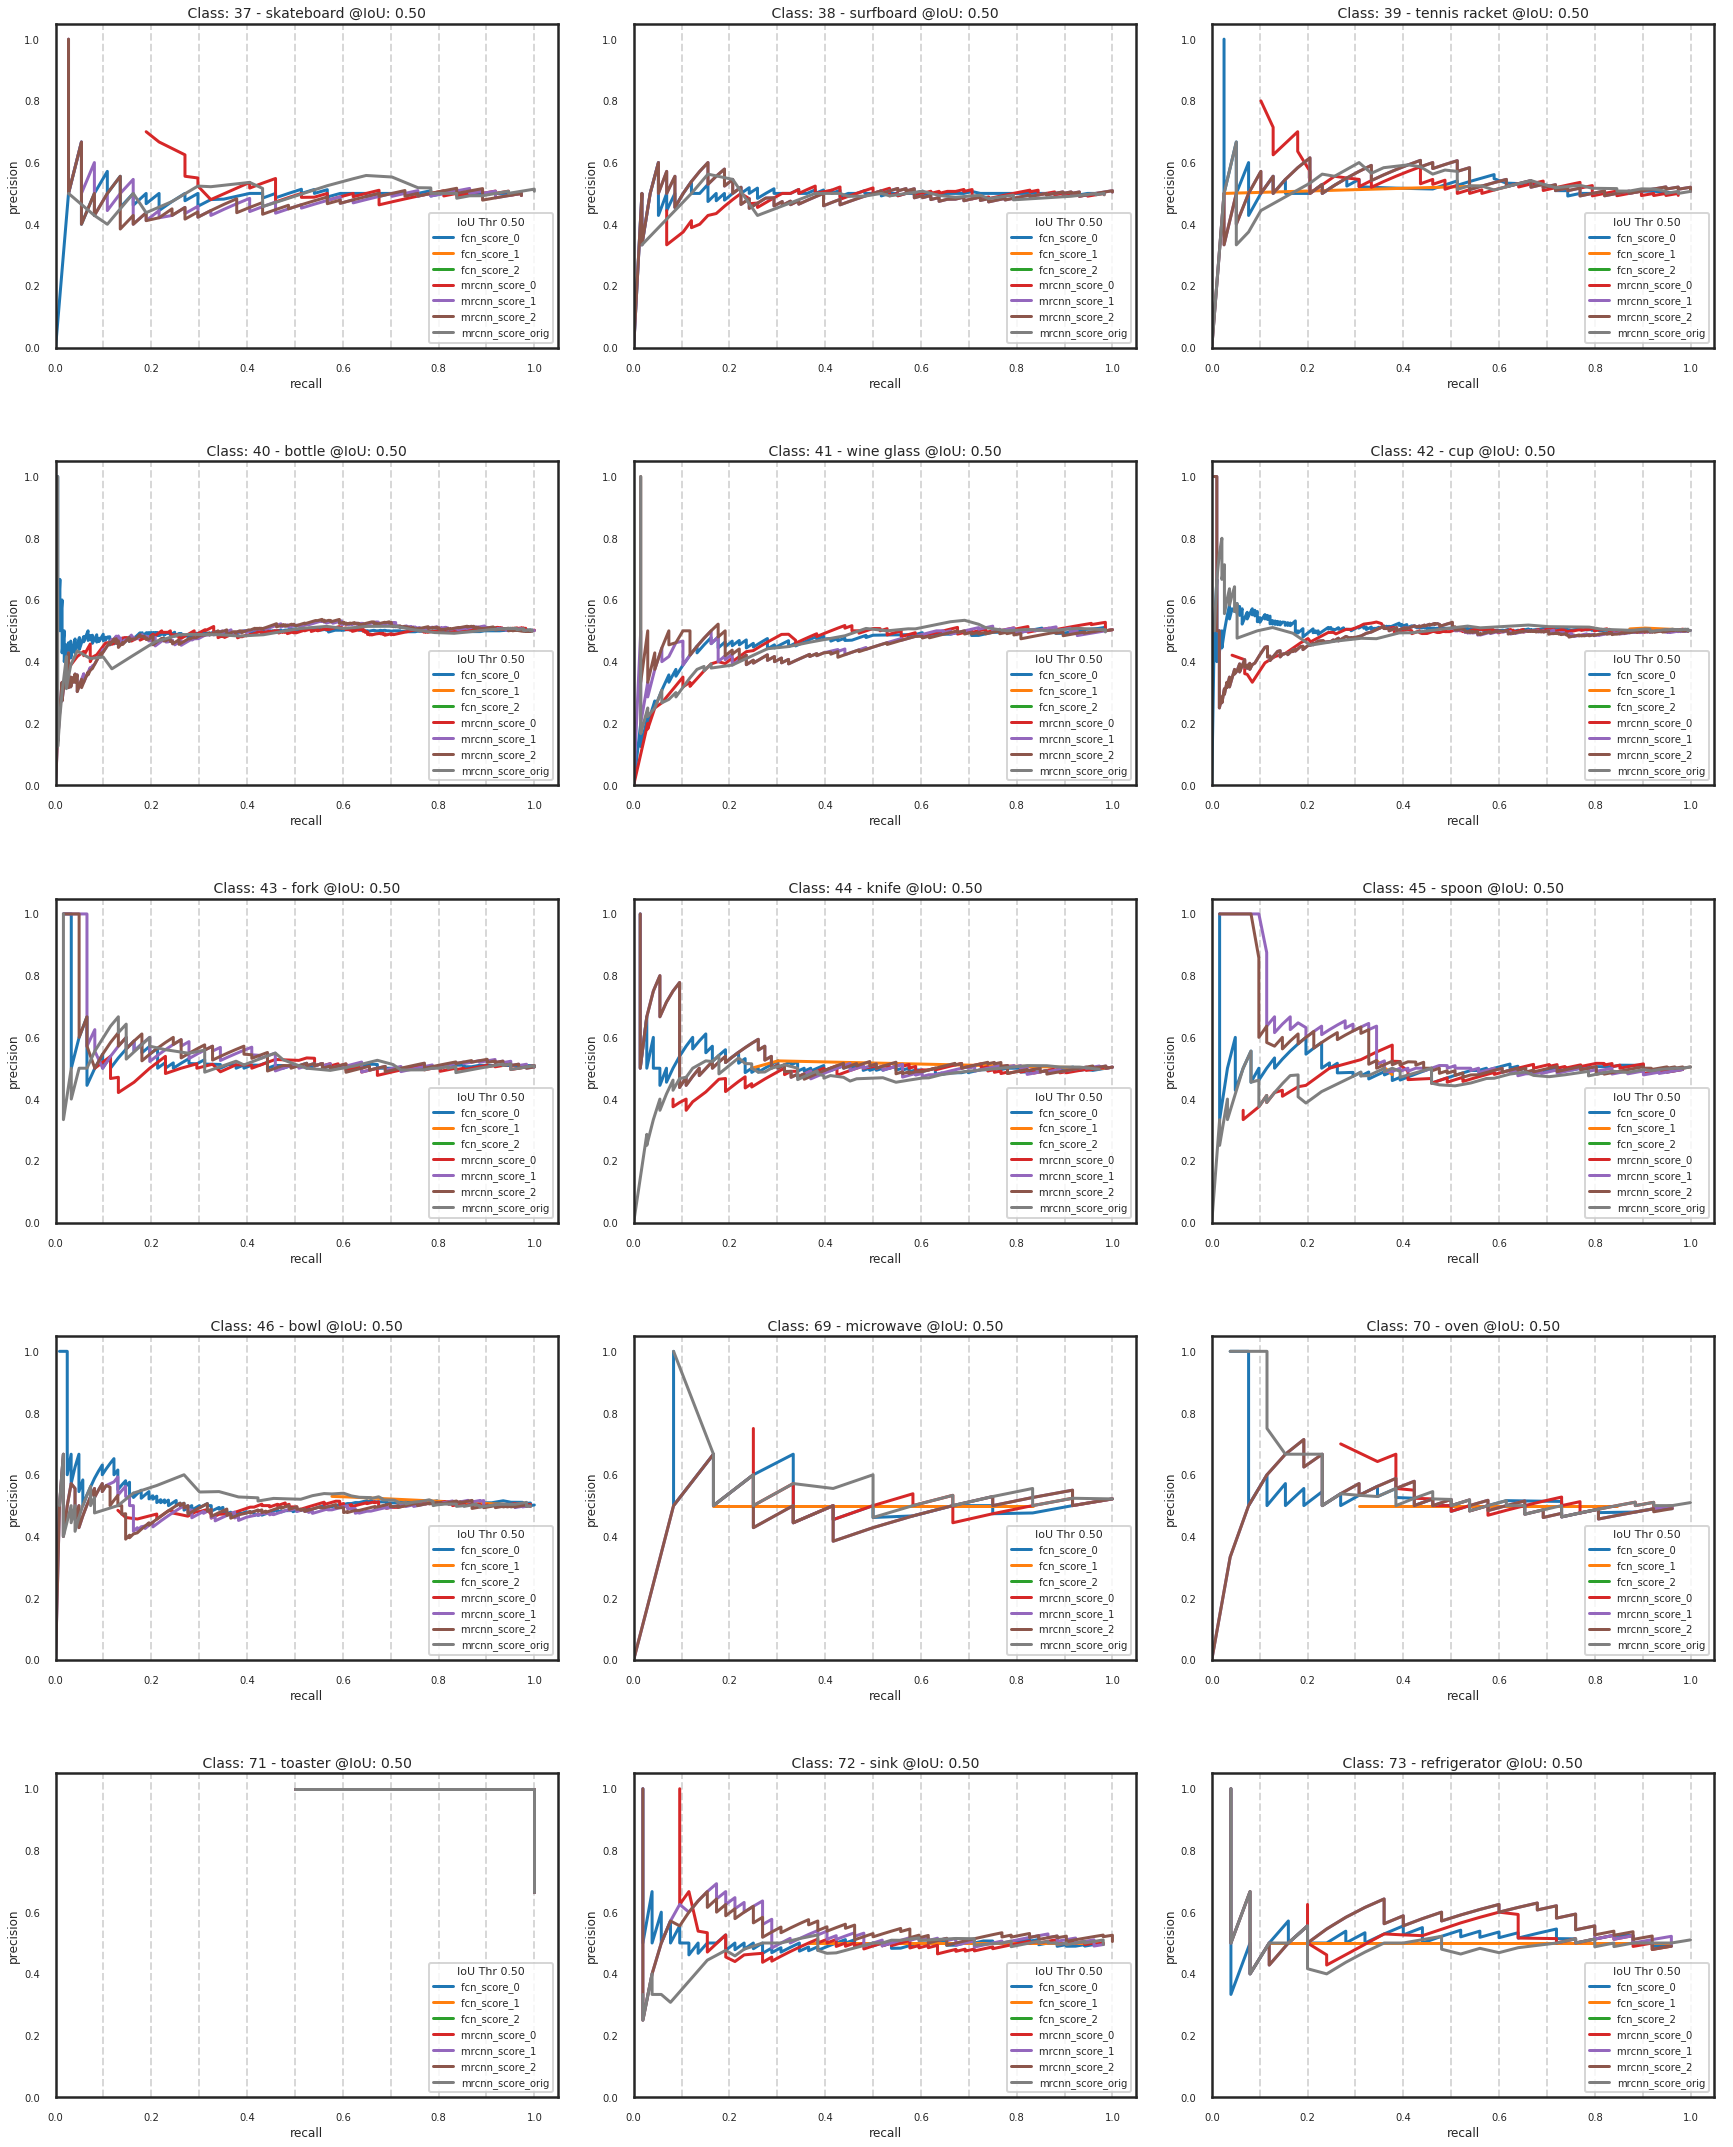

In [17]:
disp_classes = CLASS_IDS_SG1
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.5, columns = 3)
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = CLASS_IDS_SG2, class_names= CLASS_NAMES, iou = 0.5, columns = 3)

### IoU = 0.75


                                                               AP @ IoU 0.75 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.4676            0.4665            0.4656            0.4666            0.6139            0.6692            0.6365 
 2 - car                           0.4521            0.5223            0.4636            0.5091            0.5725            0.6171            0.6151 
 3 - sun                         

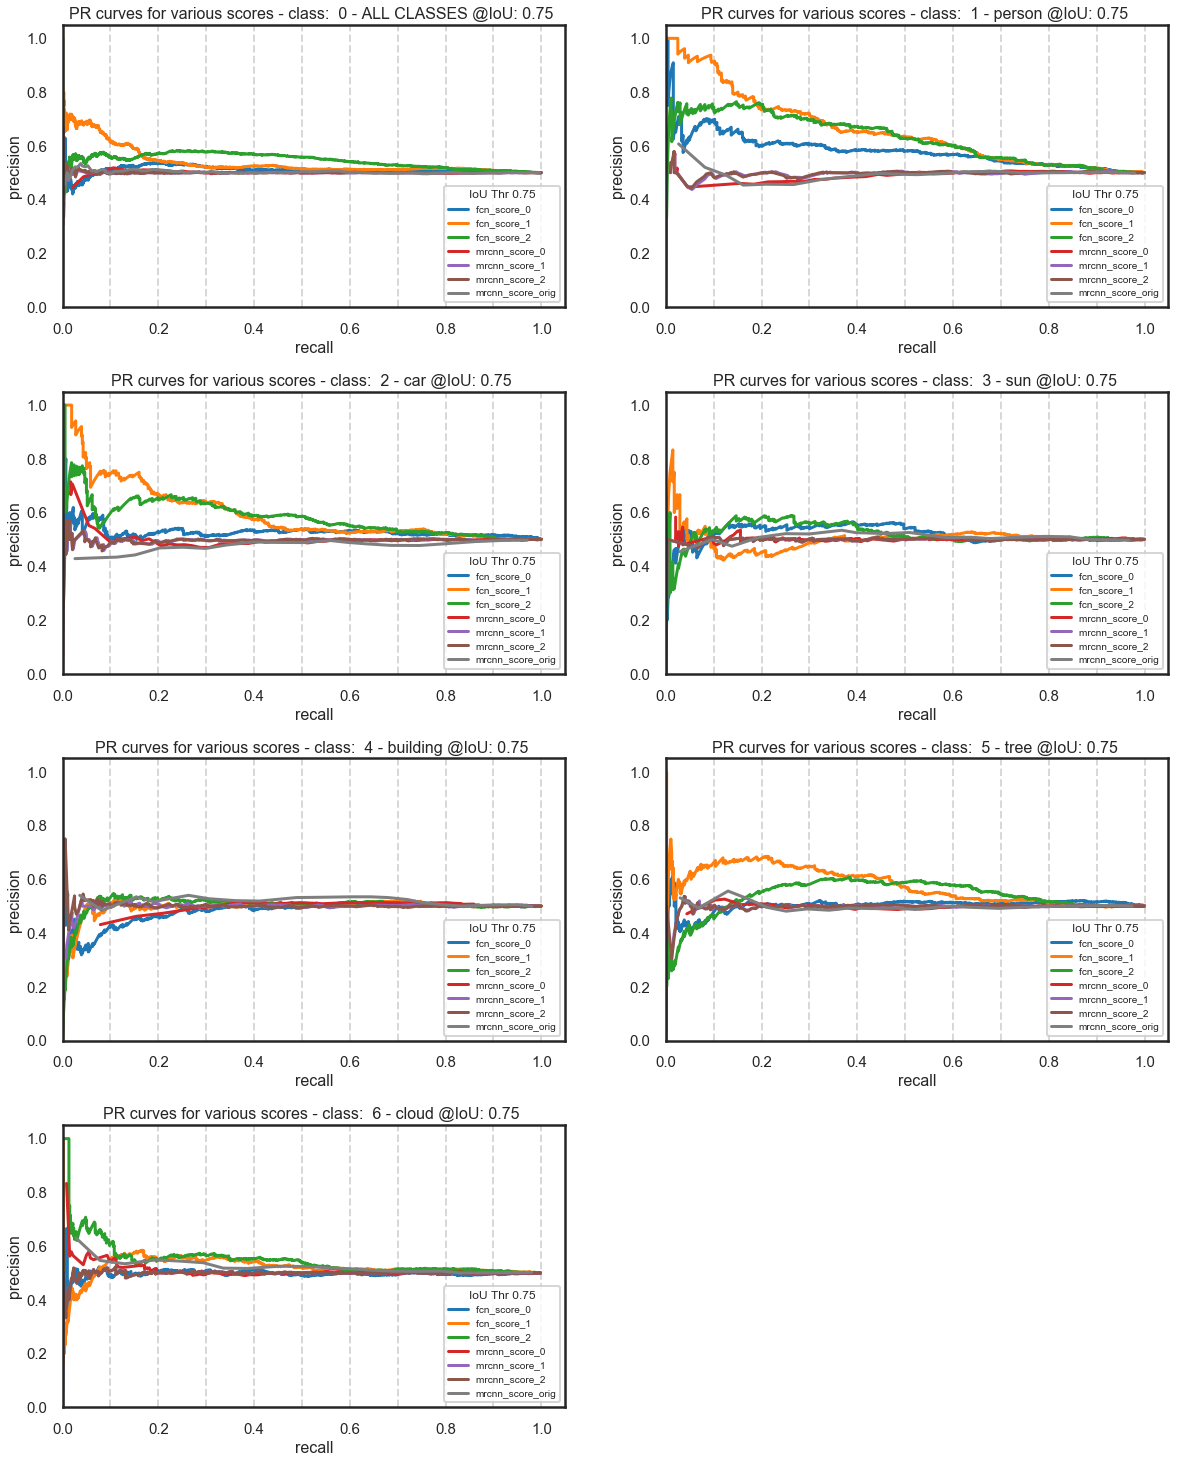

In [114]:
disp_classes = [0,1,2,3,4,5,6]  
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= class_names, iou = 0.75)

### IoU = 0.9


                                                               AP @ IoU 0.90 Thresholds for Computed Scores                                                               

--------------------------------------------------------------------------------  scores  --------------------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_0     mrcnn_score_1     mrcnn_score_2       fcn_score_0       fcn_score_1       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 - person                        0.4676            0.4665            0.4656            0.4666            0.6139            0.6692            0.6365 
 2 - car                           0.4521            0.5223            0.4636            0.5091            0.5725            0.6171            0.6151 
 3 - sun                         

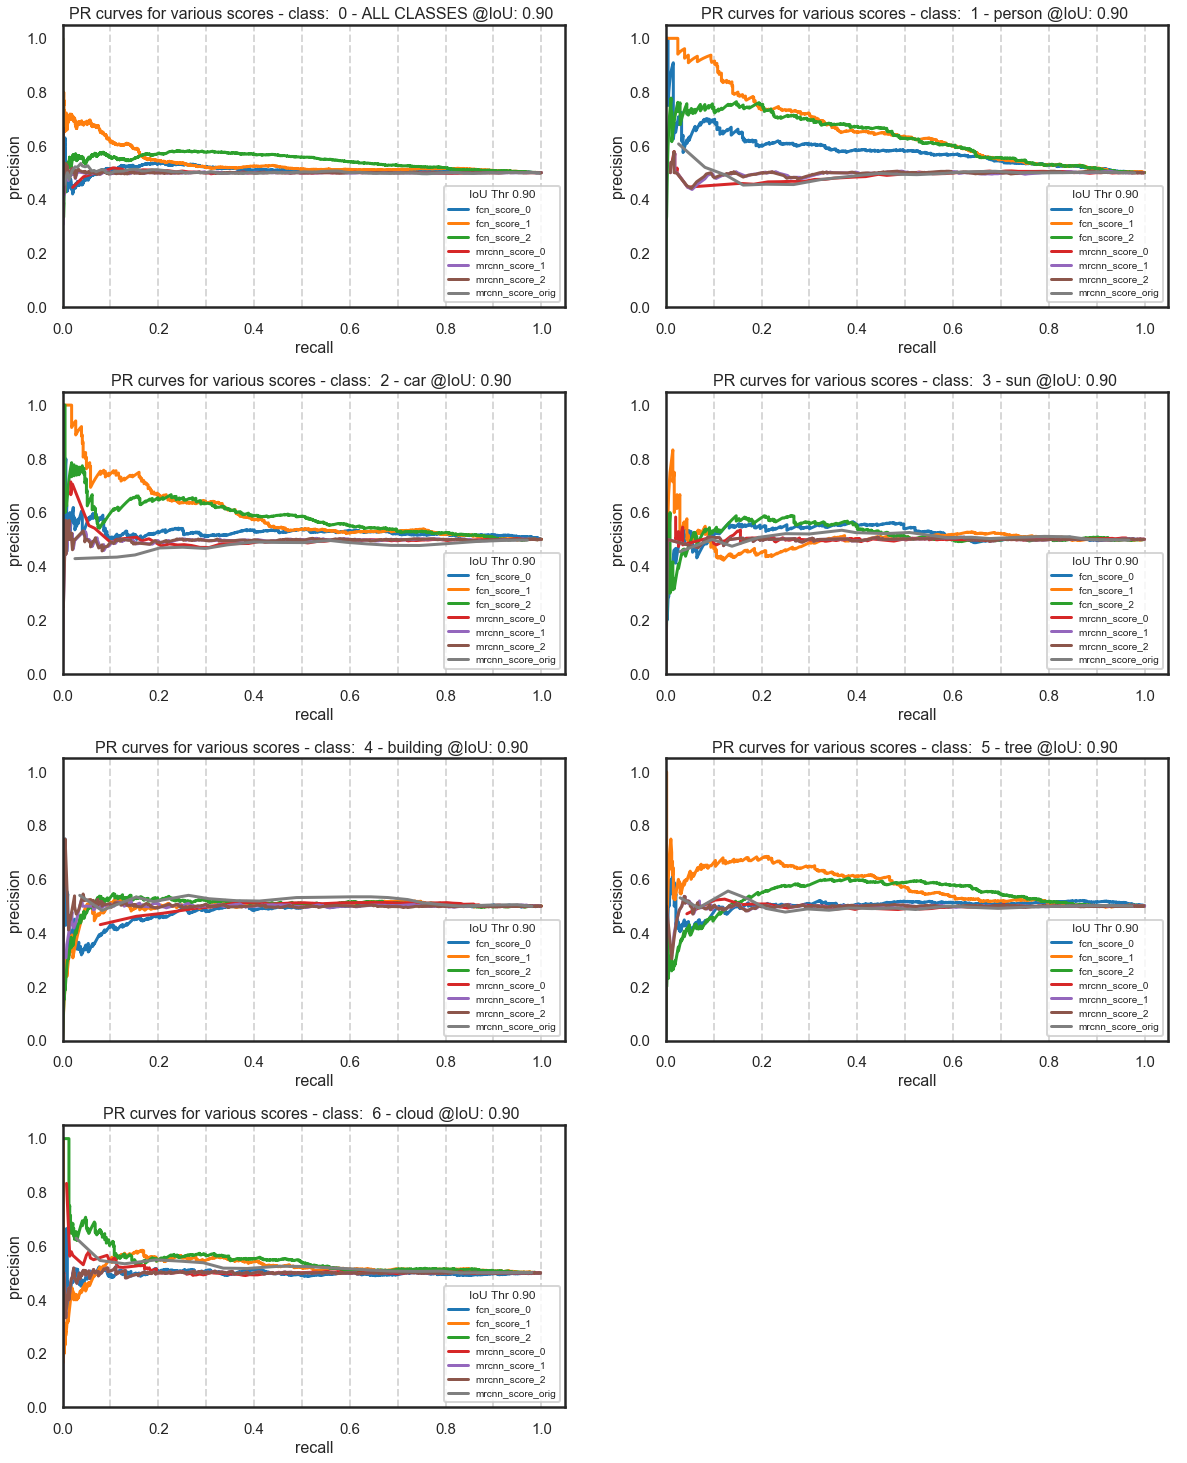

In [113]:
disp_classes = [0,1,2,3,4,5,6]  
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= class_names, iou = 0.9)

In [166]:
objs_by_cls = np.zeros((7))
for img in sorted(gt_boxes.keys()):
#     print(img, gt_boxes[img]['class_ids'], np.bincount(gt_boxes[img]['class_ids'], minlength = 7))
    objs_by_cls += np.bincount(gt_boxes[img]['class_ids'], minlength = 7)
for i in class_ids:    
    print('{:3d} {:20s} {:6d}'.format(i, class_names[i], int(objs_by_cls[i])))    

  1 person                  637
  2 car                     582
  3 sun                     340
  4 building                559
  5 tree                    569
  6 cloud                   602


## Code from `calculate_mean_ap.py`

### `get_models_scores_map()`

In [ ]:
def get_model_scores_map(pred_boxes, score_key ):
    """Creates a dictionary of from model_scores to image ids.

    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'

    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)

    """
    model_scores_map = {}
    for img_id, val in pred_boxes.items():
        for raw_score in val['scores']:
            score = round(raw_score,5)
            if score not in model_scores_map.keys():
                model_scores_map[score] = [img_id]
            else:
                model_scores_map[score].append(img_id)
    return model_scores_map

In [ ]:
from copy import deepcopy
def get_avg_precision_at_iou(in_gt_boxes, in_pred_boxes, iou_thr=0.5, score_key = 'scores'):
    '''
    Calculates average precision at given IoU threshold.

    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (list of list of floats): list of locations of predicted
            objects as [xmin, ymin, xmax, ymax]
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.

    Returns:
        dict: avg precision as well as summary info about the PR curve

        Keys:
            'avg_prec' (float): average precision for this IoU threshold
            'precisions' (list of floats): precision value for the given
                model_threshold
            'recall' (list of floats): recall value for given
                model_threshold
            'models_thrs' (list of floats): model threshold value that
                precision and recall were computed for.
    '''
    gt_boxes = deepcopy(in_gt_boxes)
    pred_boxes = deepcopy(in_pred_boxes)
    model_scores_map    = get_model_scores_map(pred_boxes, score_key = score_key)
    sorted_model_scores = sorted(model_scores_map.keys())
    print('sorted_model_scores :' , sorted_model_scores)
    
    ## Sort the predicted boxes in ascending score order (lowest scoring boxes first):
    for img_id in pred_boxes.keys():
        
        arg_sort = np.argsort(pred_boxes[img_id][score_key])
        print()
        print('image_id : ', img_id)
        print('--------------------------')
        print('scores:', pred_boxes[img_id]['scores'] )
        print(score_key, ':' ,pred_boxes[img_id][score_key] )
        print(pred_boxes[img_id]['boxes'] )
        print('argsort:' , arg_sort)
        pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id][score_key])[arg_sort].tolist()
        pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()
        print('after')
        print('--------------------------')
        print('scores:', pred_boxes[img_id]['scores'] )
        print(score_key, ':' ,pred_boxes[img_id][score_key] )
        print(pred_boxes[img_id]['boxes'] )
        
        
    pred_boxes_pruned = deepcopy(pred_boxes)

    precisions  = []
    recalls     = []
    model_thrs  = []
    img_results = {}
    
    # Loop over model score thresholds and calculate precision, recall
    for ithr, model_score_thr in enumerate(sorted_model_scores[:-1]):
        # On first iteration, define img_results for the first time:
        print('------------------------------------------------')
        print('ithr ', ithr, 'model_scr_thr', model_score_thr)
        print('------------------------------------------------')
        img_ids = gt_boxes.keys() if ithr == 0 else model_scores_map[model_score_thr]
        for img_id in img_ids:
            gt_boxes_img = gt_boxes[img_id]['boxes']
            box_scores = pred_boxes_pruned[img_id]['scores']
            start_idx = 0
            for score in box_scores:
                if score <= model_score_thr:
#                     pred_boxes_pruned[img_id]
                    start_idx += 1
                else:
                    break
            print('Start Idx is ', start_idx)
            # Remove boxes, scores of lower than threshold scores:
            pred_boxes_pruned[img_id]['scores'] = pred_boxes_pruned[img_id]['scores'][start_idx:]
            pred_boxes_pruned[img_id]['boxes']  = pred_boxes_pruned[img_id]['boxes'][start_idx:]

            # Recalculate image results for this image
            img_results[img_id] = cmap.get_single_image_results(
                gt_boxes_img, pred_boxes_pruned[img_id]['boxes'], iou_thr)
            print('image_id : ', img_id)
            print('--------------------------')            
            pp.pprint(gt_boxes_img)
            pp.pprint(pred_boxes_pruned[img_id]['boxes'])
            pp.pprint(img_results[img_id])
            print()
        prec, rec = cmap.calc_precision_recall(img_results)
        print('precision:', prec, 'Recall:', rec)
        precisions.append(prec)
        recalls.append(rec)
        model_thrs.append(model_score_thr)

    precisions = np.array(precisions)
    recalls = np.array(recalls)
    print('final precsions:', precisions)
    print('final recall   :', recalls)
    prec_at_rec = []
    for recall_level in np.linspace(0.0, 1.0, 11):
        try:
            args = np.argwhere(recalls >= recall_level).flatten()
            prec = max(precisions[args])
        except ValueError:
            prec = 0.0
        prec_at_rec.append(prec)
    avg_prec = np.mean(prec_at_rec)

    return {
        'avg_prec': avg_prec,
        'precisions': precisions,
        'recalls': recalls,
        'model_thrs': model_thrs}


In [ ]:
class_ids = [1,2,3,4,5,6]
## build gt_boxes_class, pr_boxes_class which only containing info for each class 
gt_boxes_class = {}
pr_boxes_class = {}

for cls in class_ids :
    print('class id :', cls)
    a, b = filter_by_class(gt_boxes, pr_boxes, class_id= cls)
    gt_boxes_class[cls] = a
    pr_boxes_class[cls] = b
print(gt_boxes_class.keys())    
print(pr_boxes_class.keys())    
print(gt_boxes_class[1]['newshapes_00992'].keys())


In [ ]:
# msm = get_model_scores_map(pr_boxes_class[1], score_key = 'scores') 
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
# msm = get_model_scores_map(pr_boxes_class[1], score_key = 'scores') 
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

print()

print(pr_boxes['newshapes_00992']['class_ids'])
print(pr_boxes['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes['newshapes_00992']['scores'])
print(pr_boxes['newshapes_00992']['boxes'])

In [ ]:
data1 = get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'scores')
print(data1)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data2 = get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_orig')
print(data2)

In [ ]:
print(data1)
print(data2)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data3 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_orig')
print(data3)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data4 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'scores')
print(data4)

In [ ]:
data5 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_norm')
print(data5)

In [ ]:
print(data3)
print(data4)
print(data5)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_norm'])
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])